# Import & Setup

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

# Load DataSet

In [24]:
df = pd.read_csv('Walmart.csv')
 
 # Top 5
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [25]:
#Know Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [26]:
#Describe Data
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

# EDA (Exploratory Data Analysis)

In [27]:
# Convert Date column to datetime with correct format (DD-MM-YYYY)
# ----------------------------
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
numeric_cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']


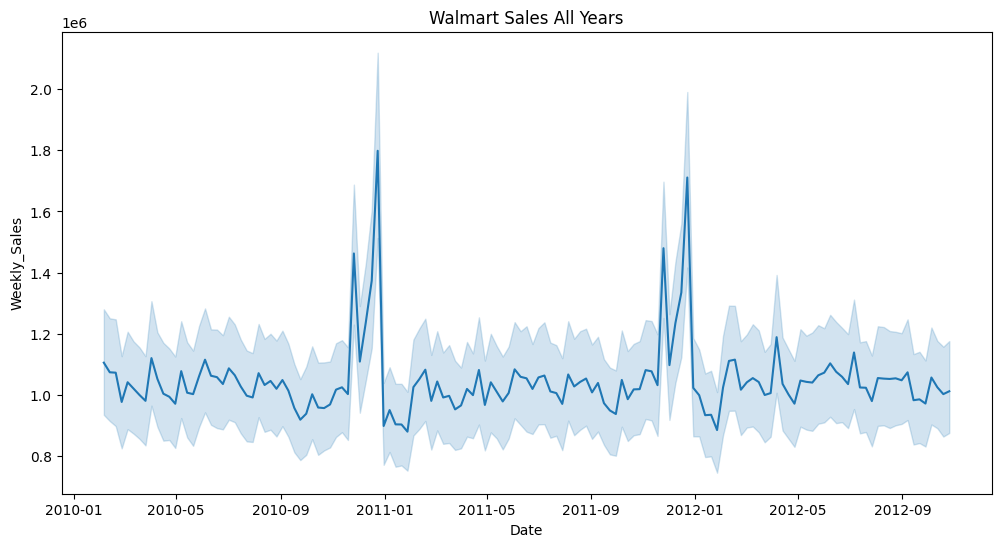

In [28]:
# Line Plot of Walmart Sales Over All Years

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Walmart Sales All Years')
plt.savefig("walmart_sales_trend.png", dpi=300, bbox_inches='tight')
plt.show()


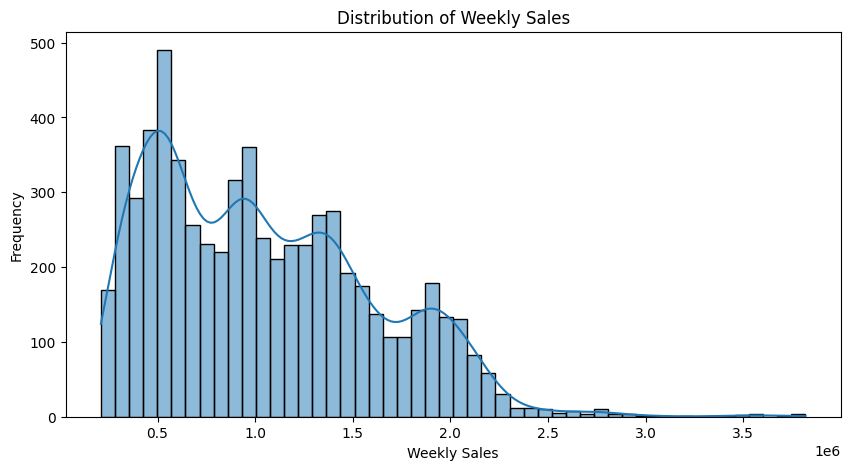

In [29]:
# Histogram of Weekly Sales
# ----------------------------
plt.figure(figsize=(10,5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.savefig("weekly_sales_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

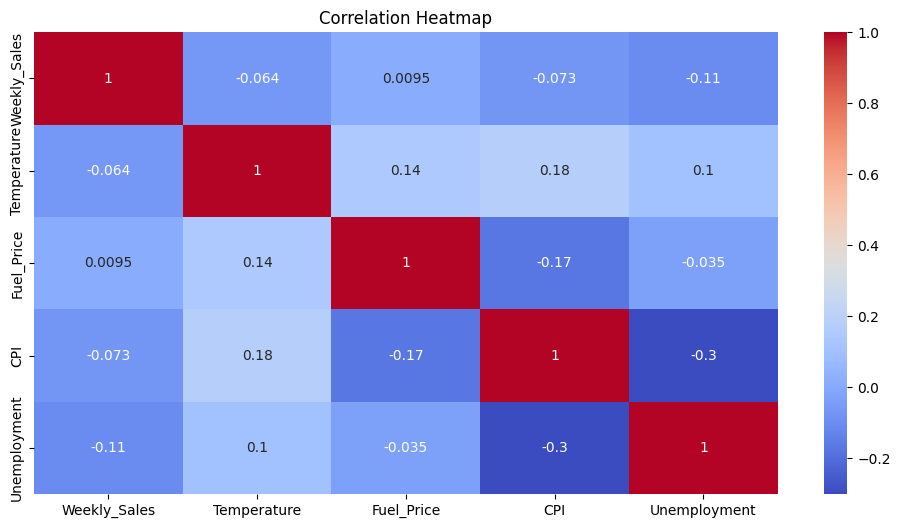

In [30]:
# Correlation Heatmap
# ----------------------------
plt.figure(figsize=(12,6))
numeric_df = df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("Correlation_Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

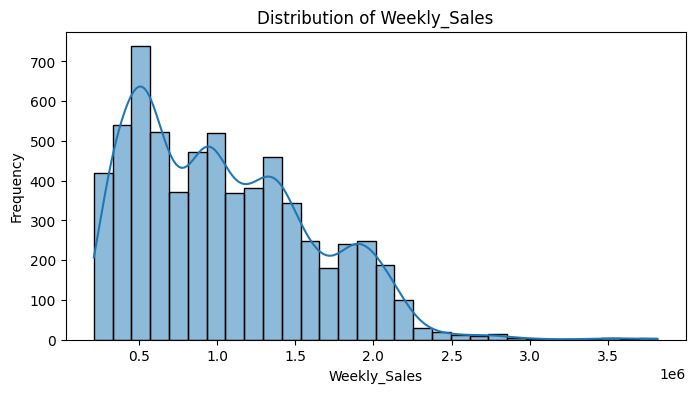

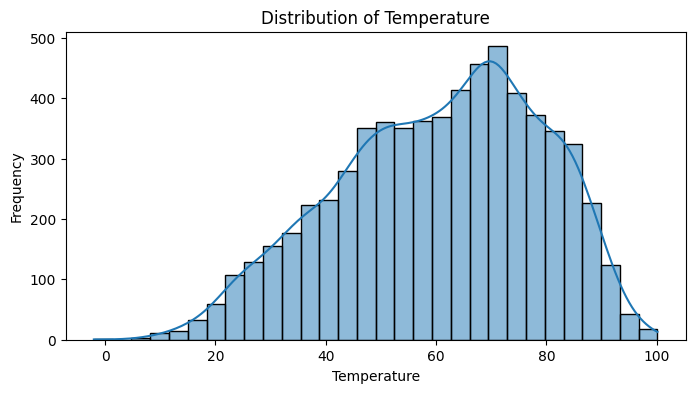

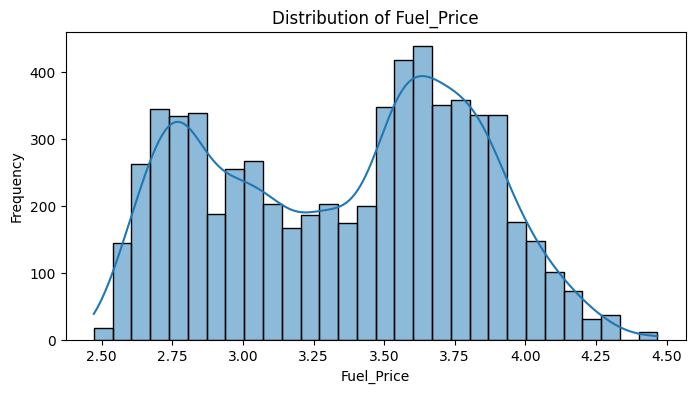

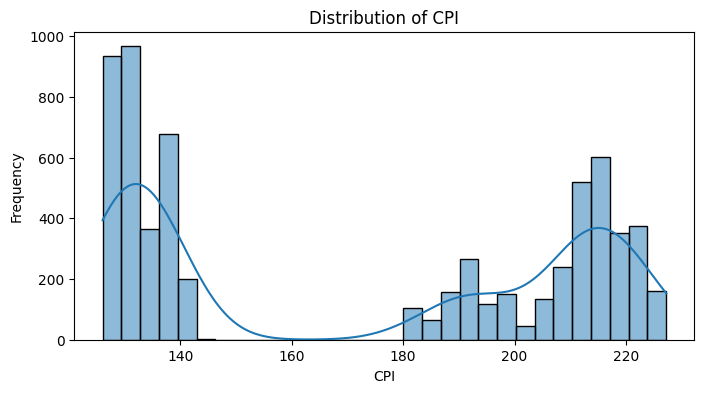

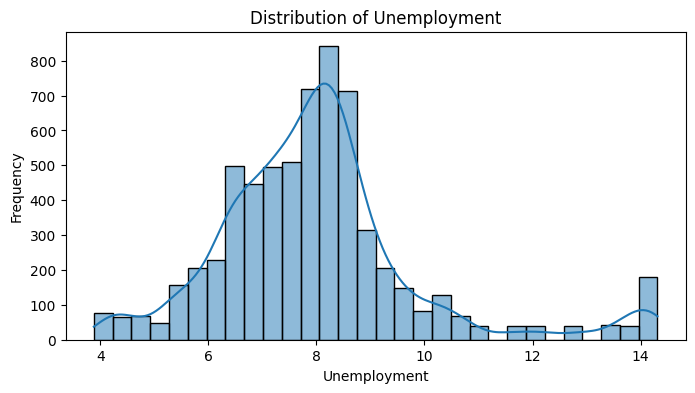

In [31]:
# Histogram of All Numeric Columns
# ----------------------------
for col in numeric_df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f"{col}_histogram.png", dpi=300, bbox_inches='tight')
    plt.show()

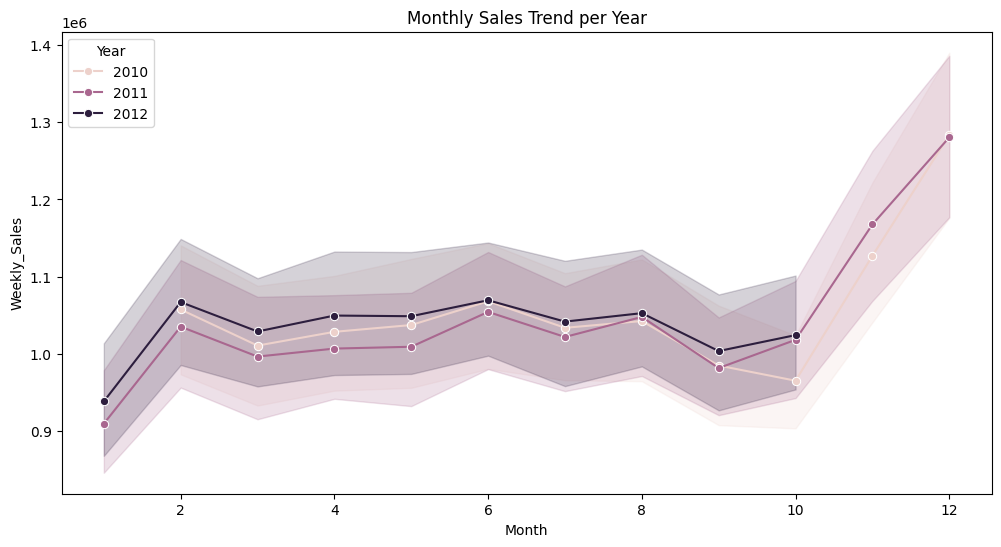

In [32]:
# Seasonal Trend by Month for Each Year
# ----------------------------
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=df, marker='o')
plt.title('Monthly Sales Trend per Year')
plt.savefig("monthly_sales_trend.png", dpi=300, bbox_inches='tight')
plt.show()

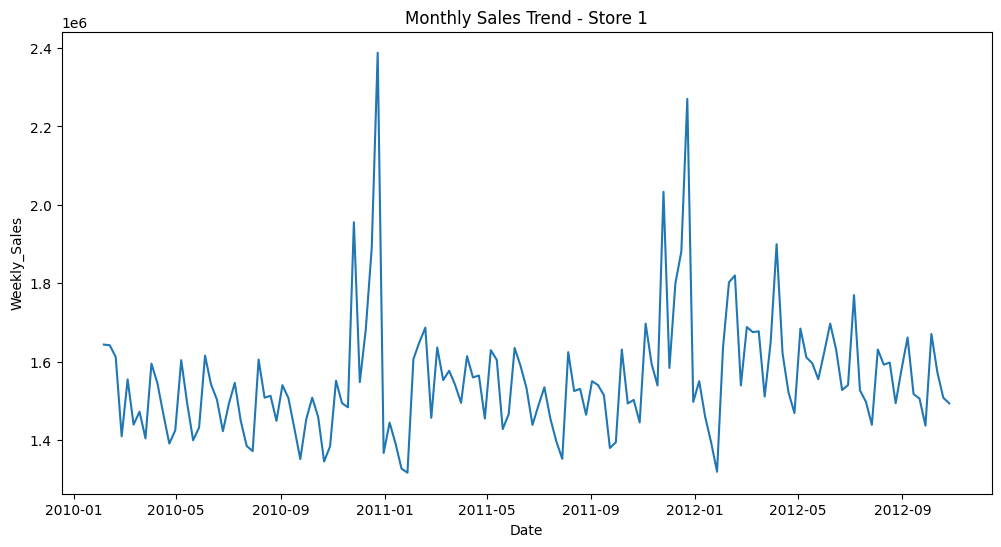

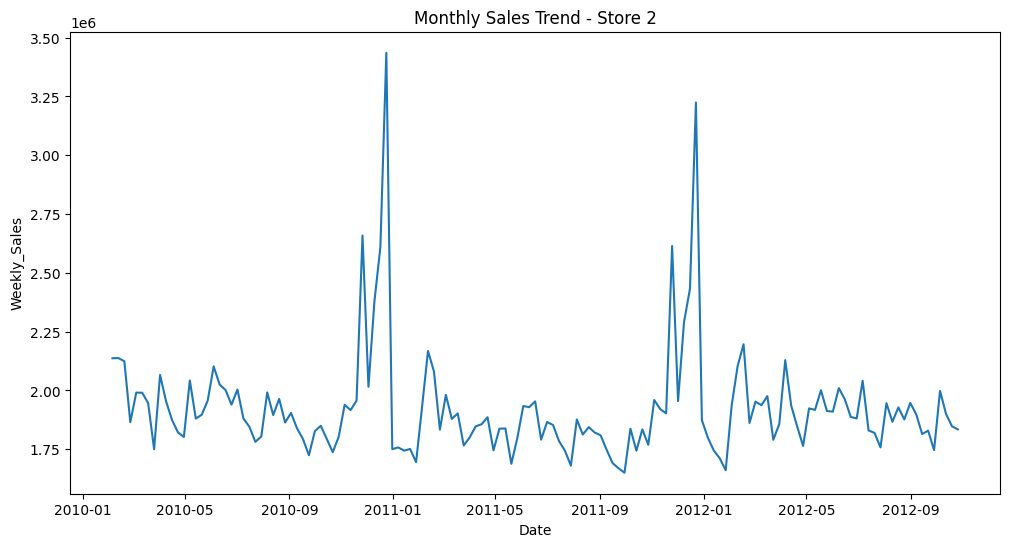

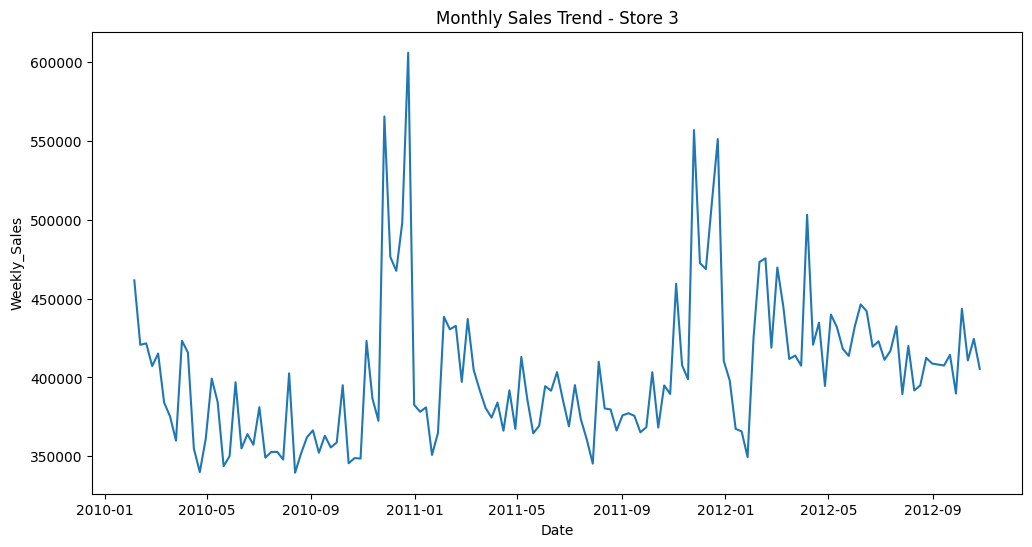

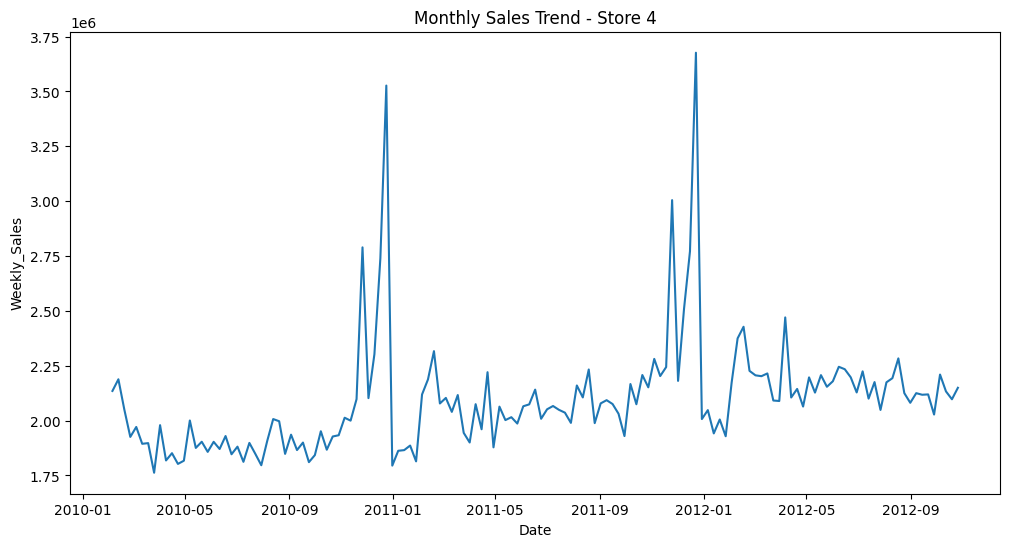

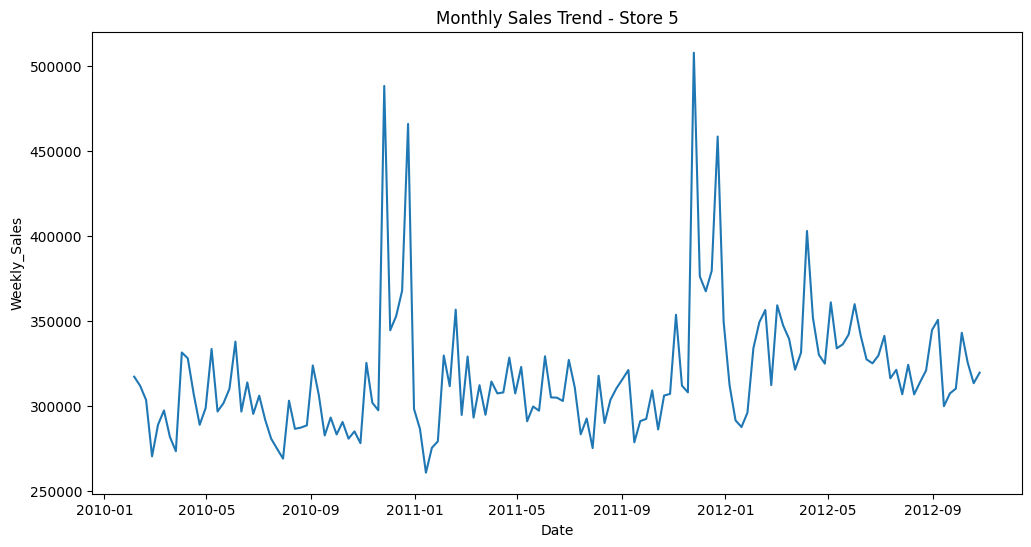

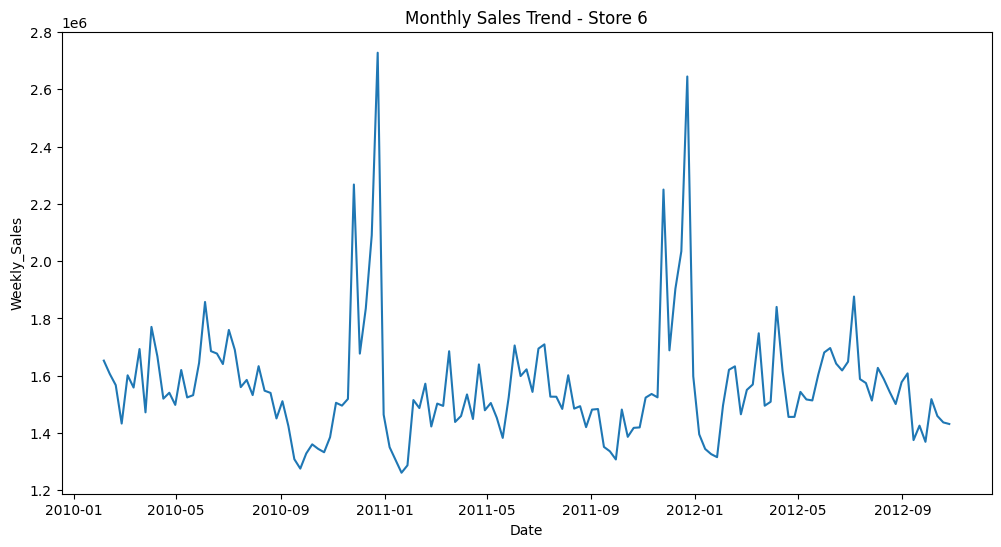

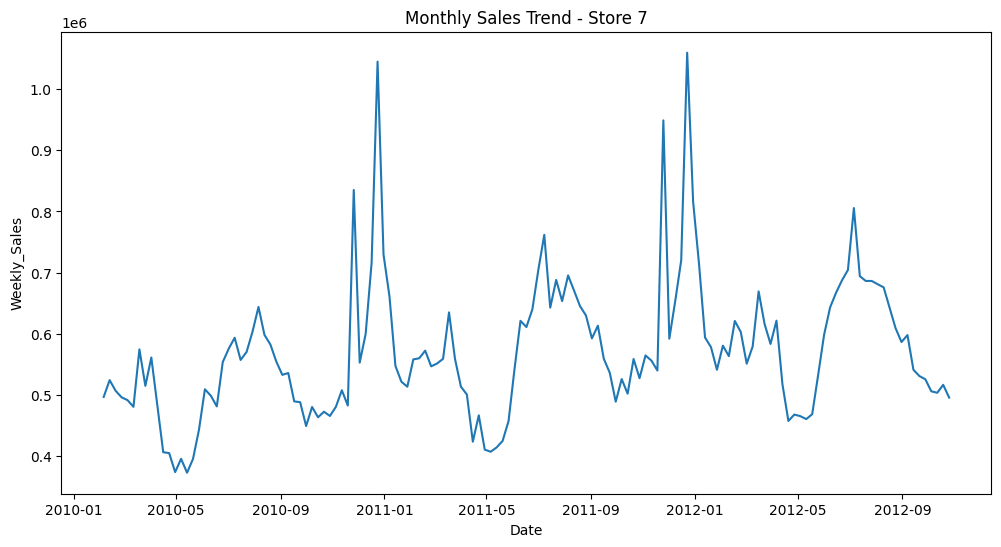

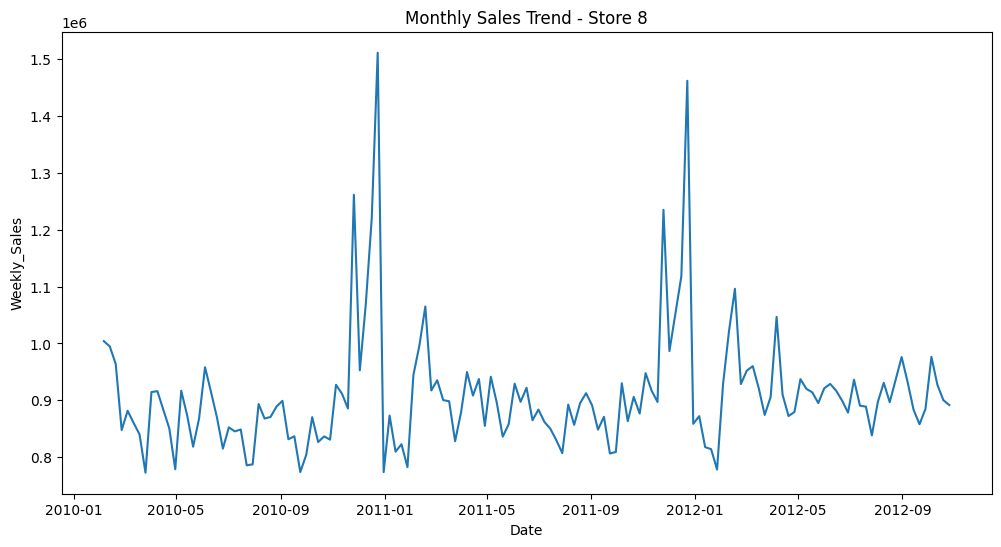

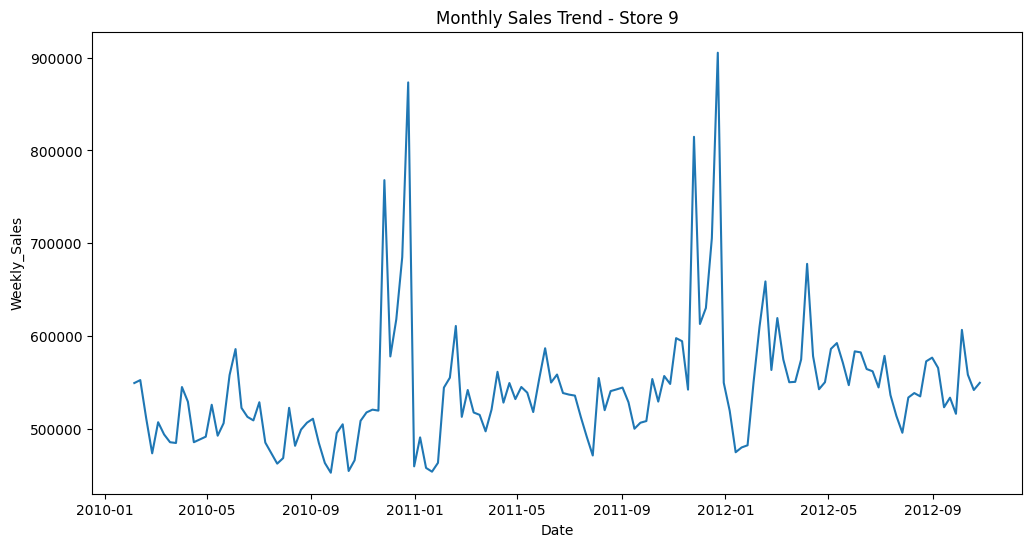

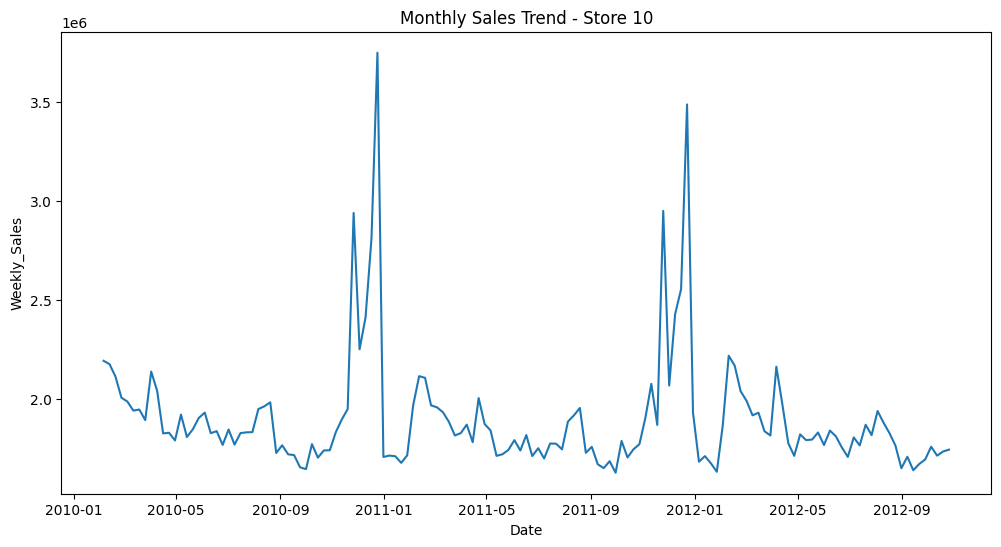

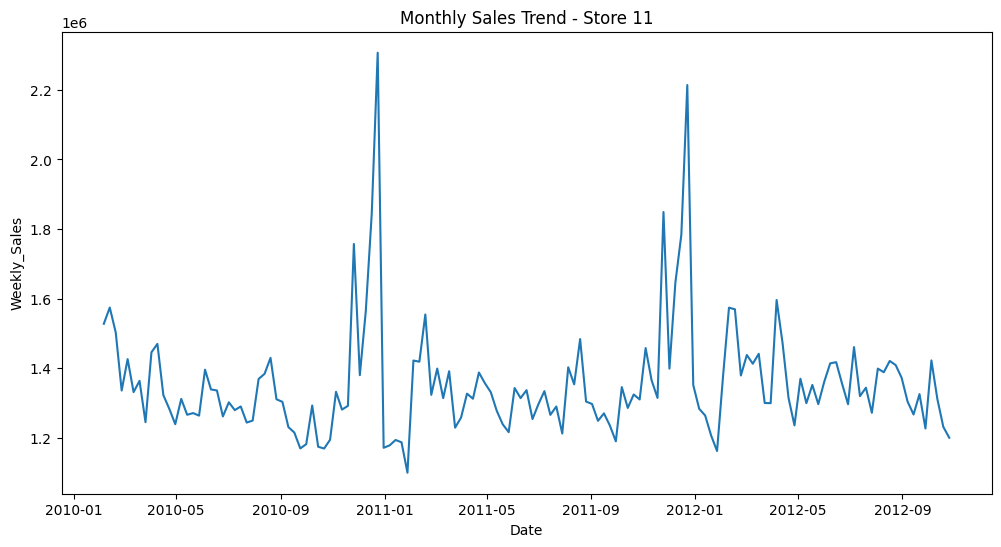

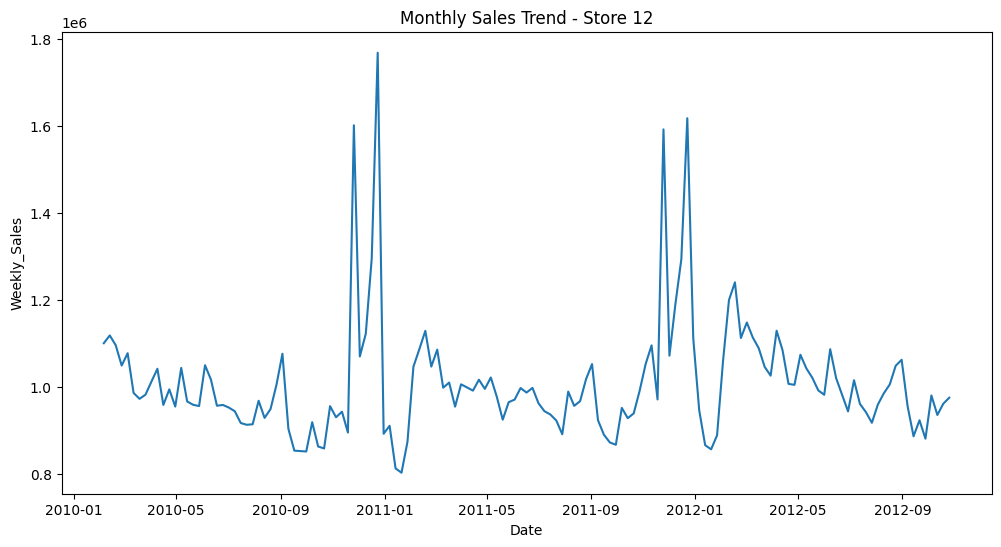

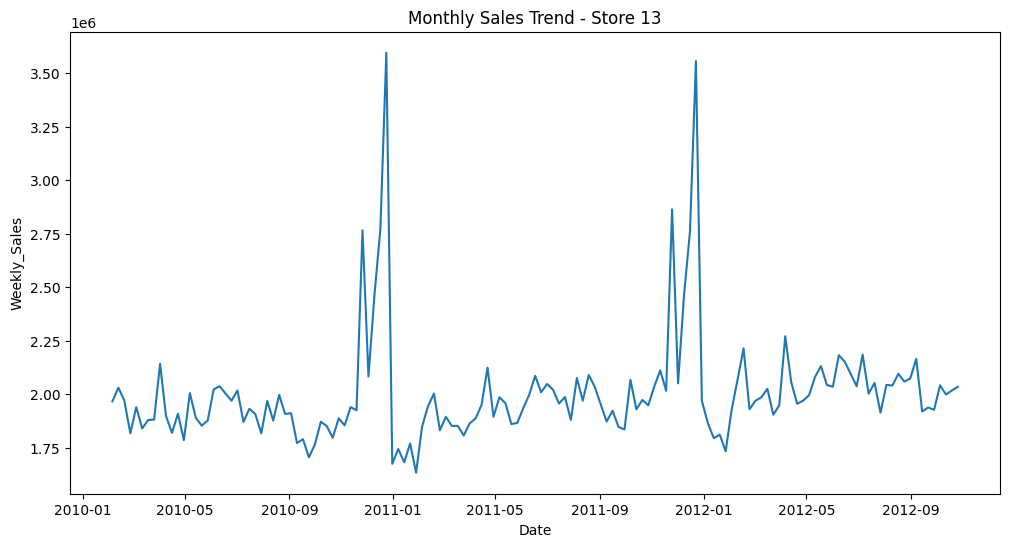

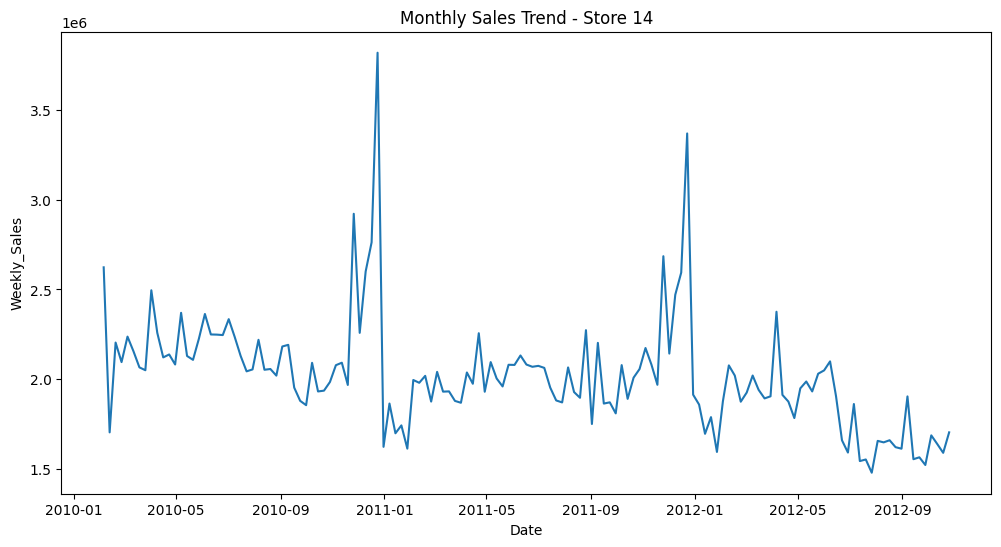

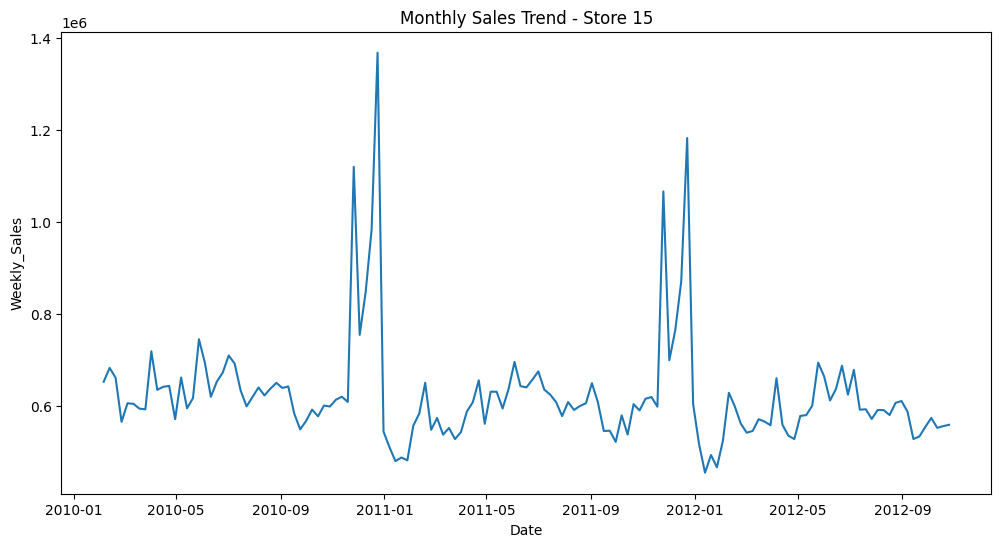

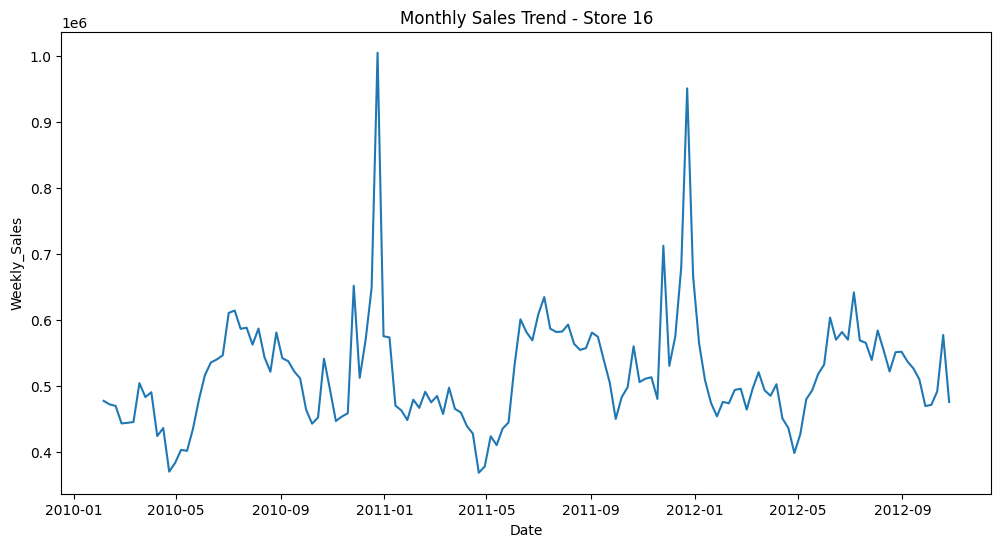

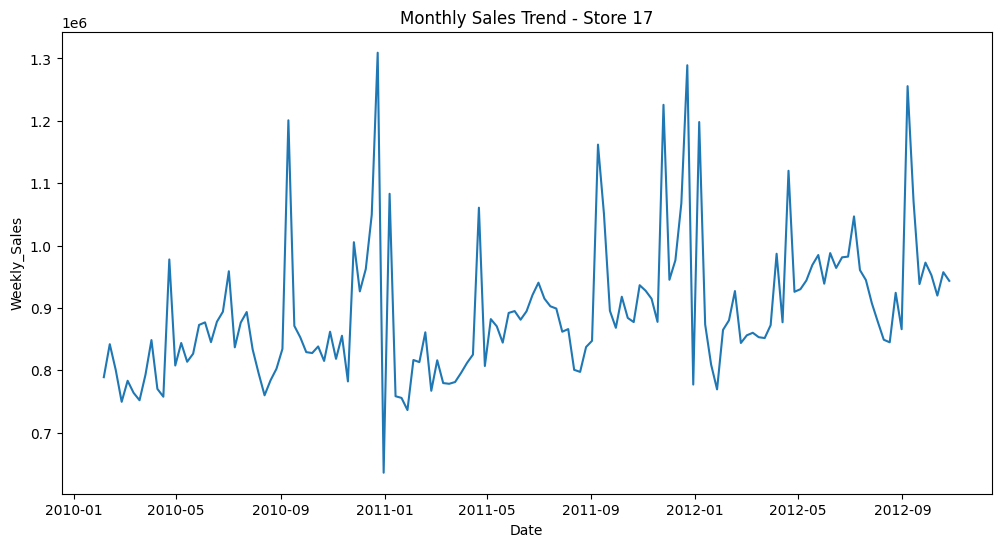

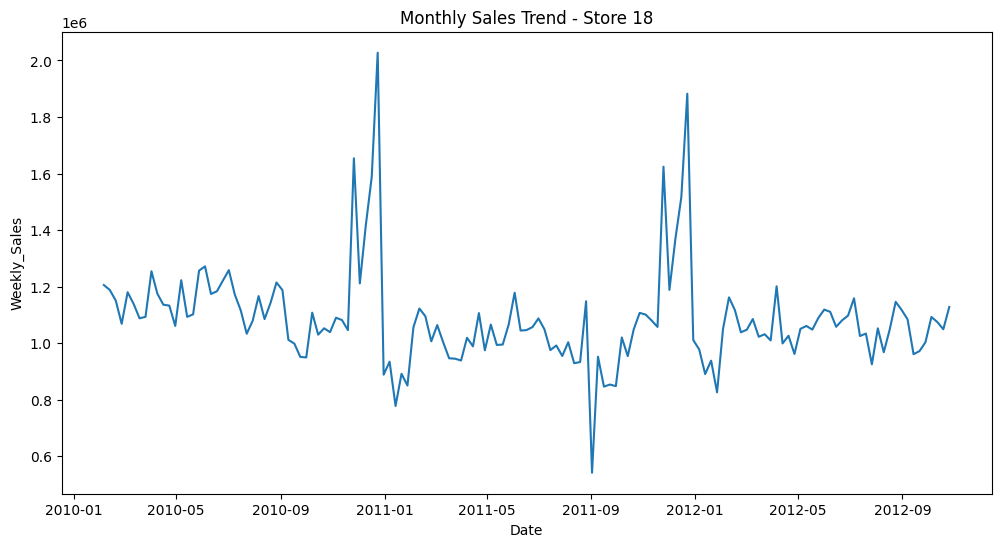

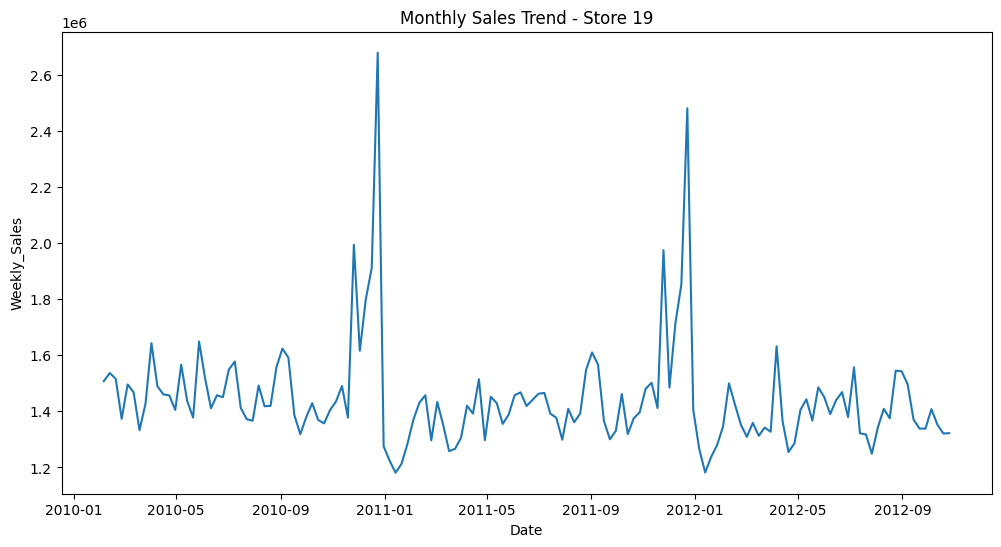

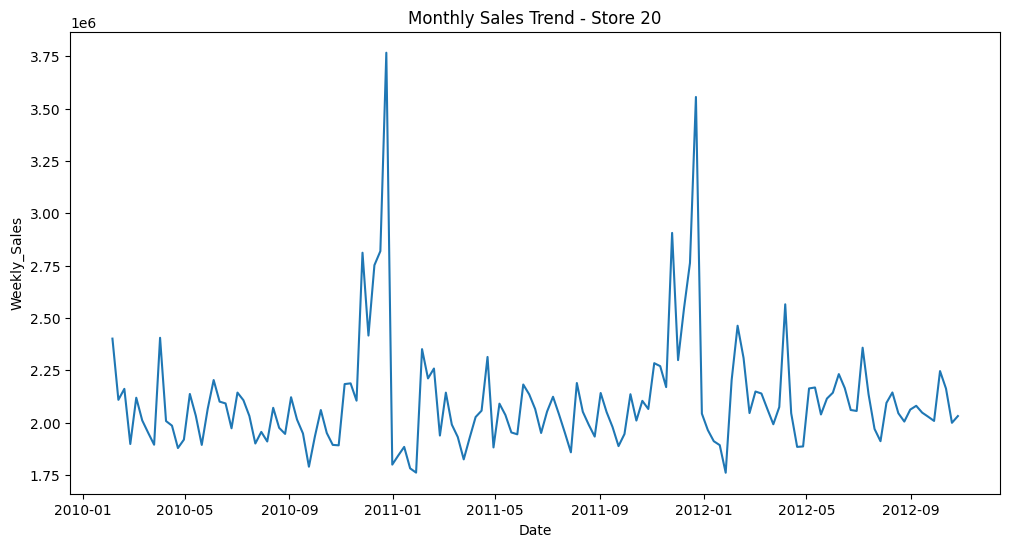

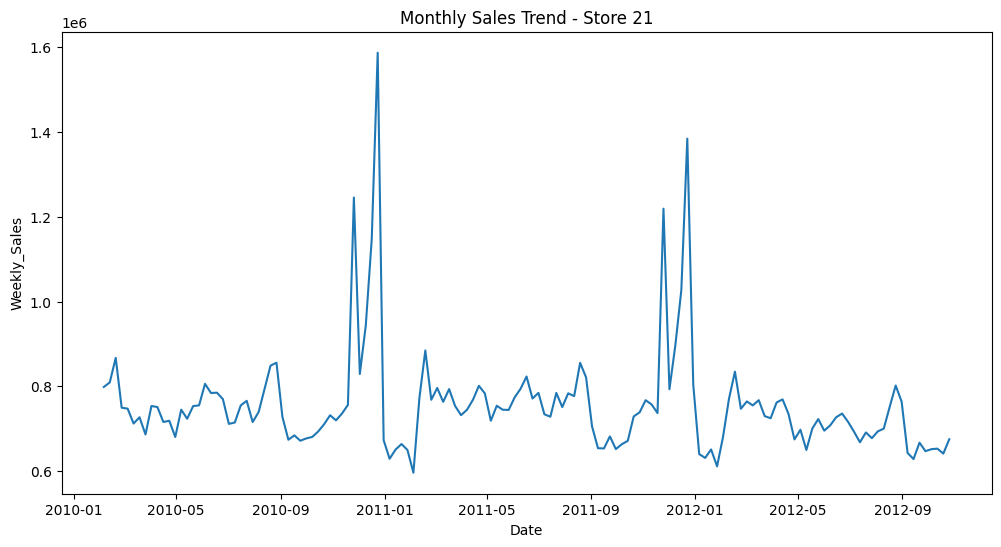

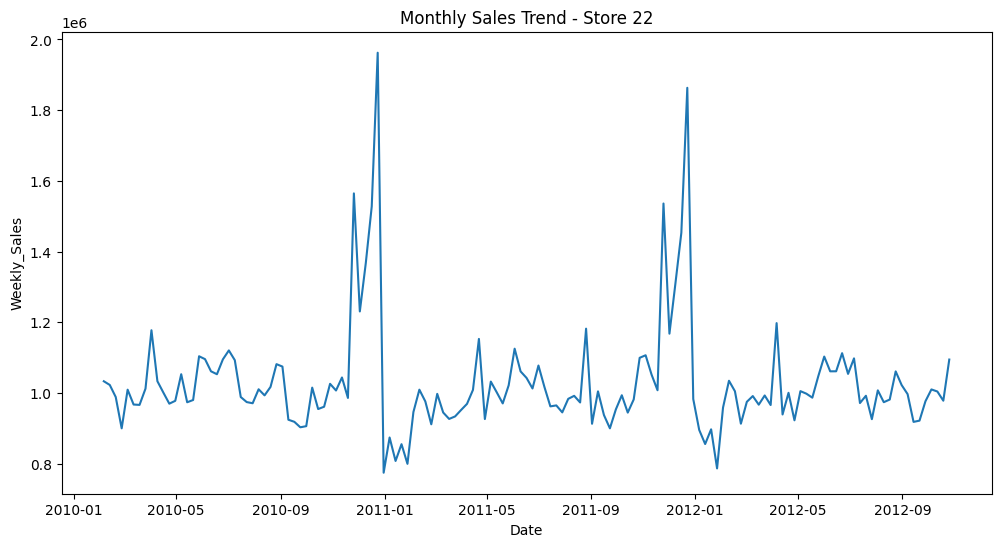

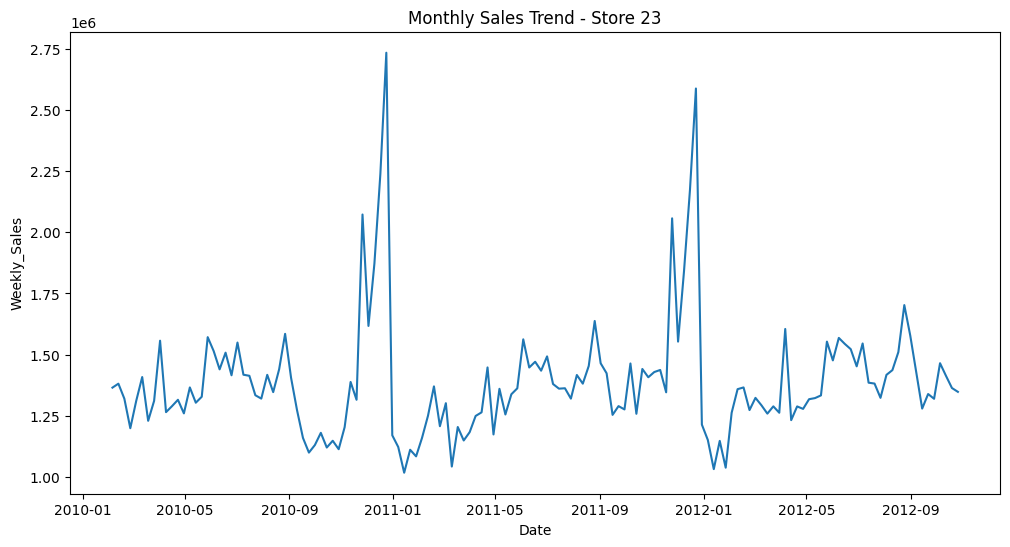

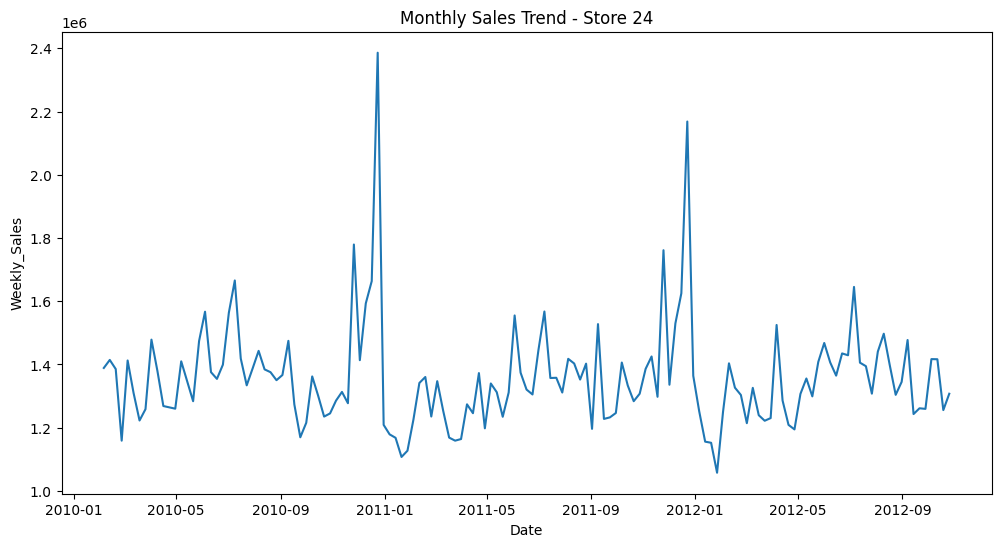

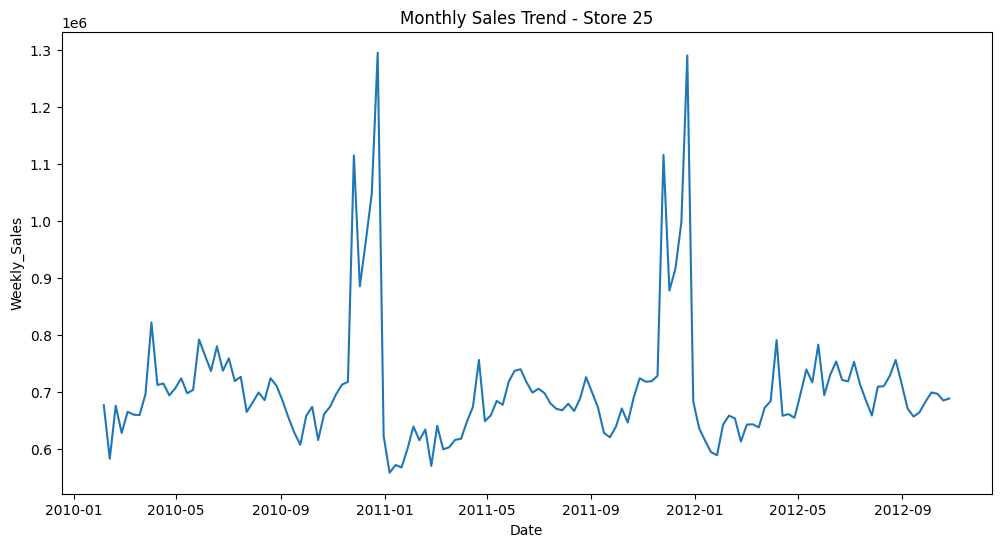

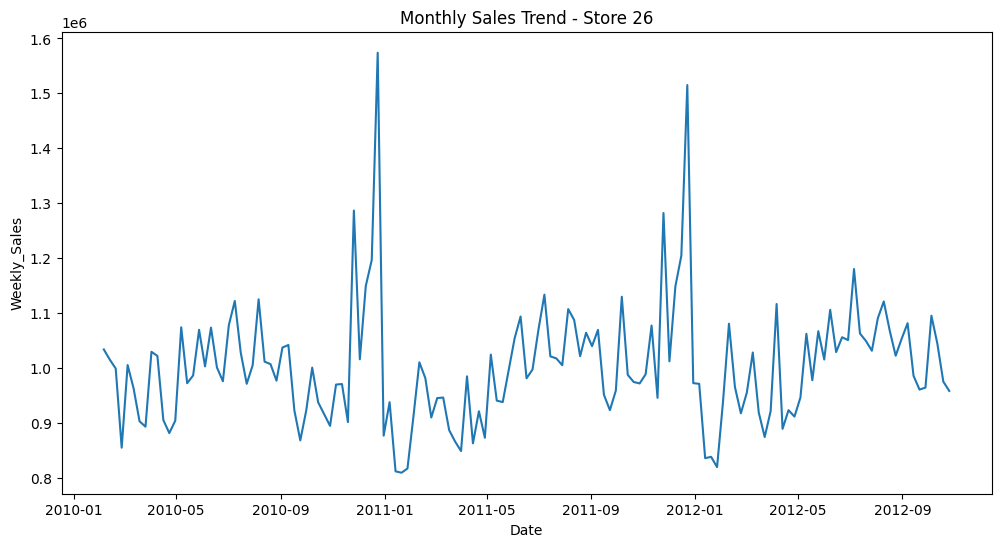

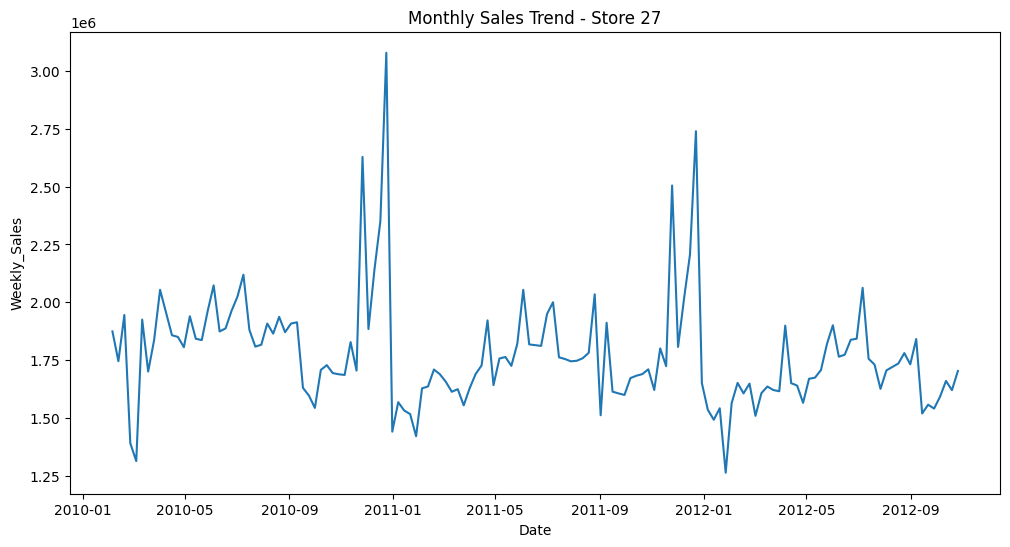

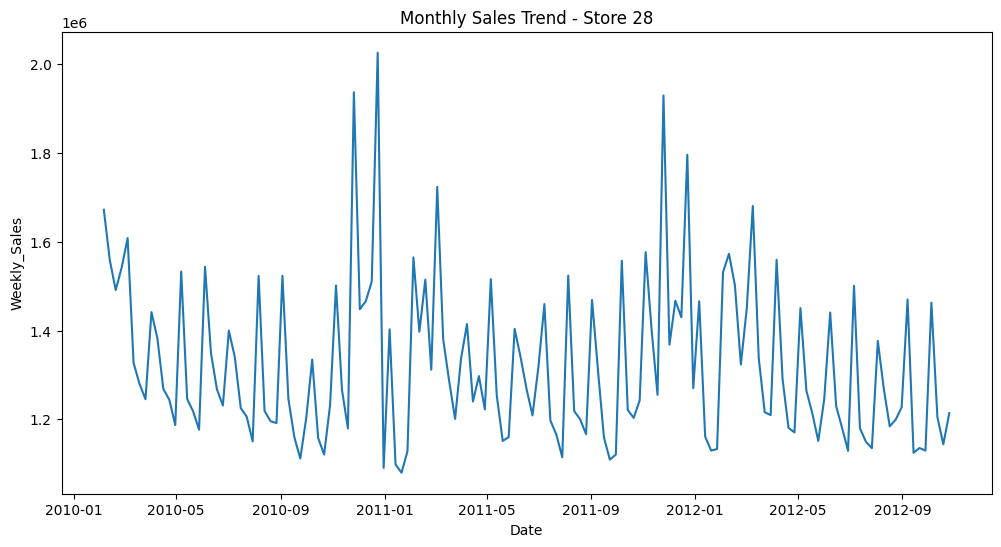

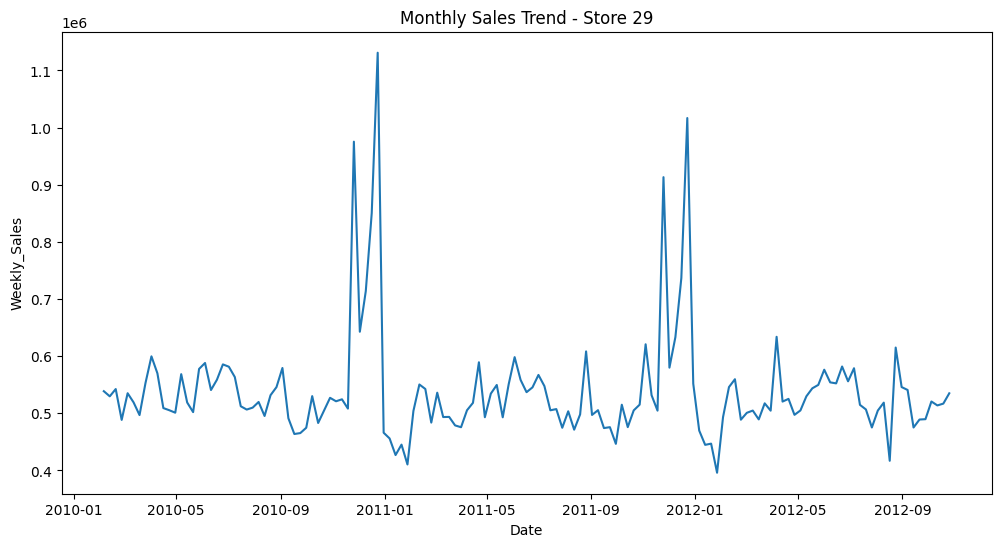

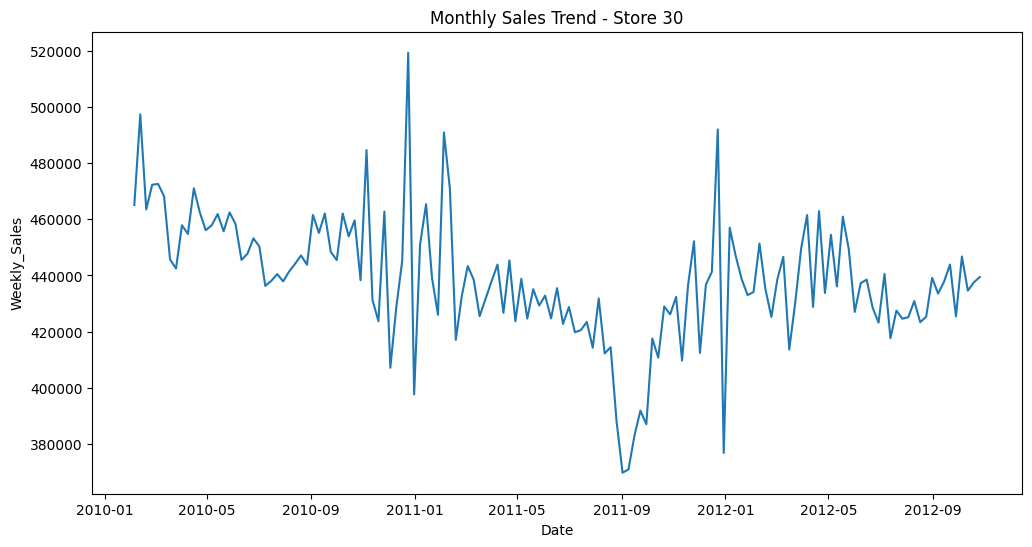

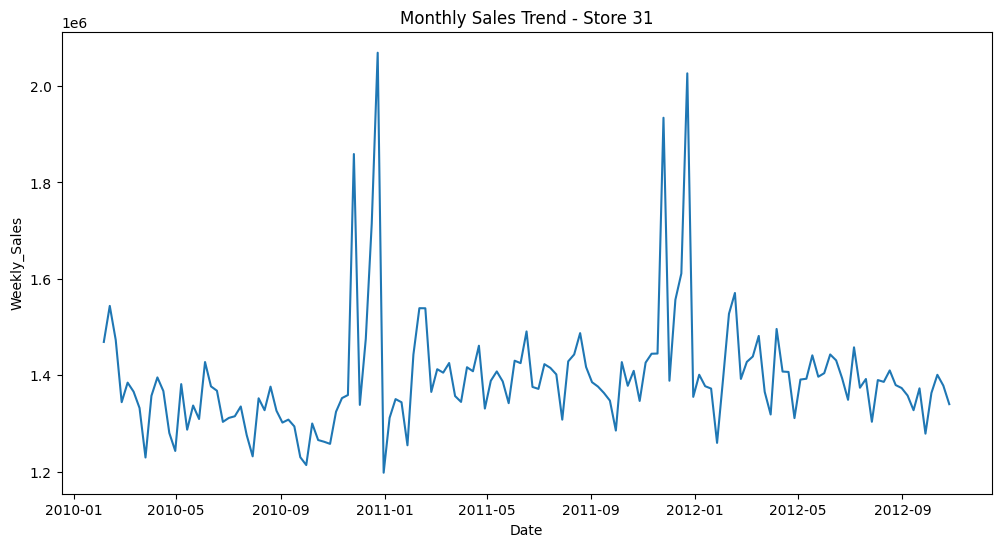

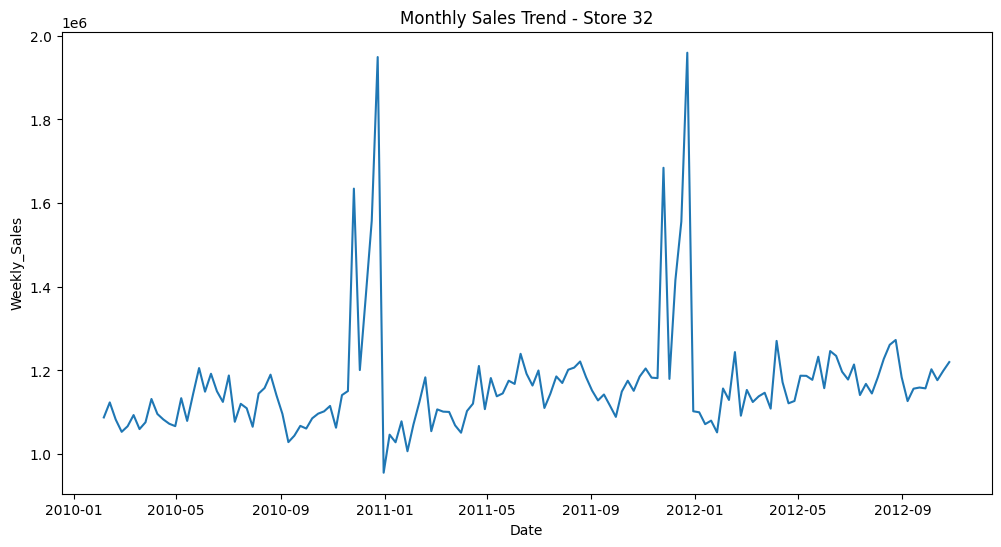

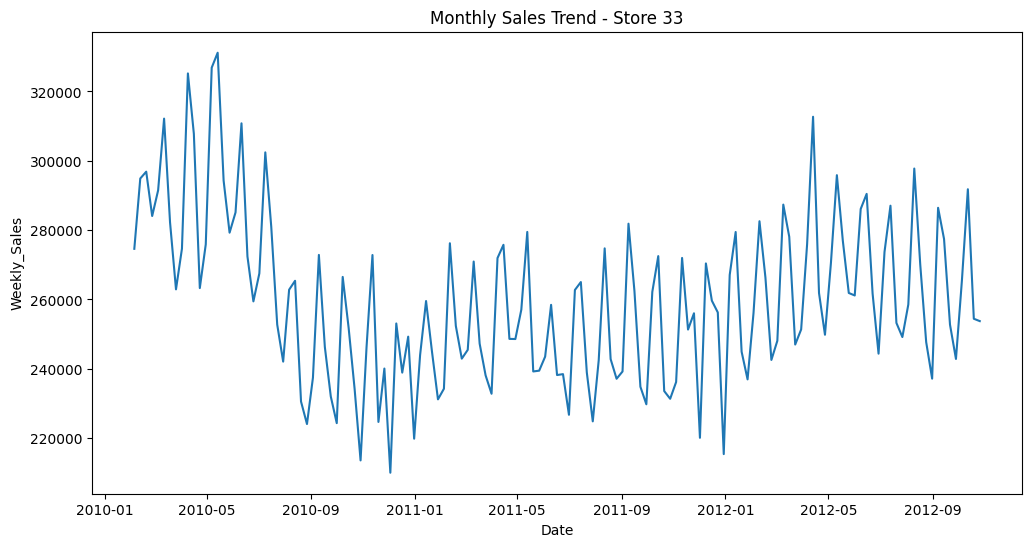

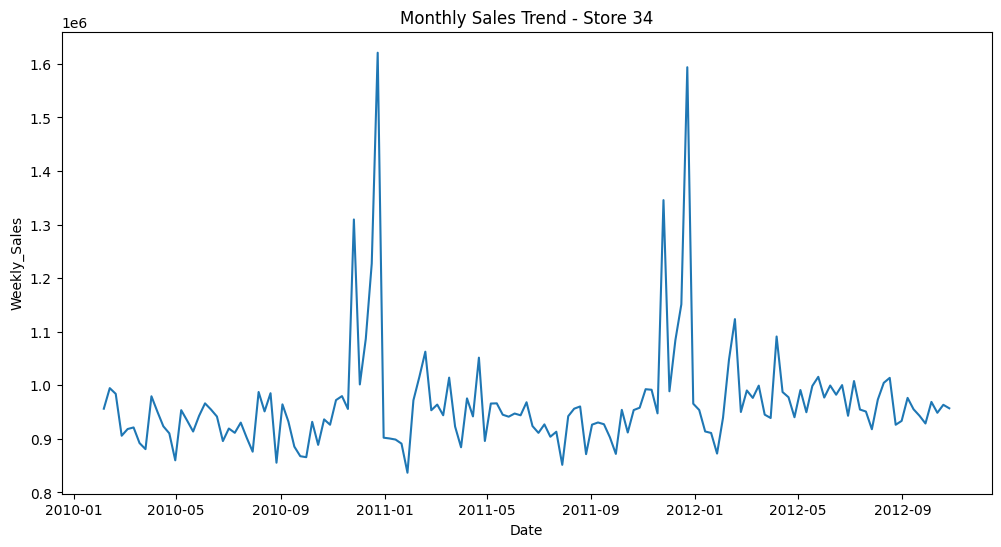

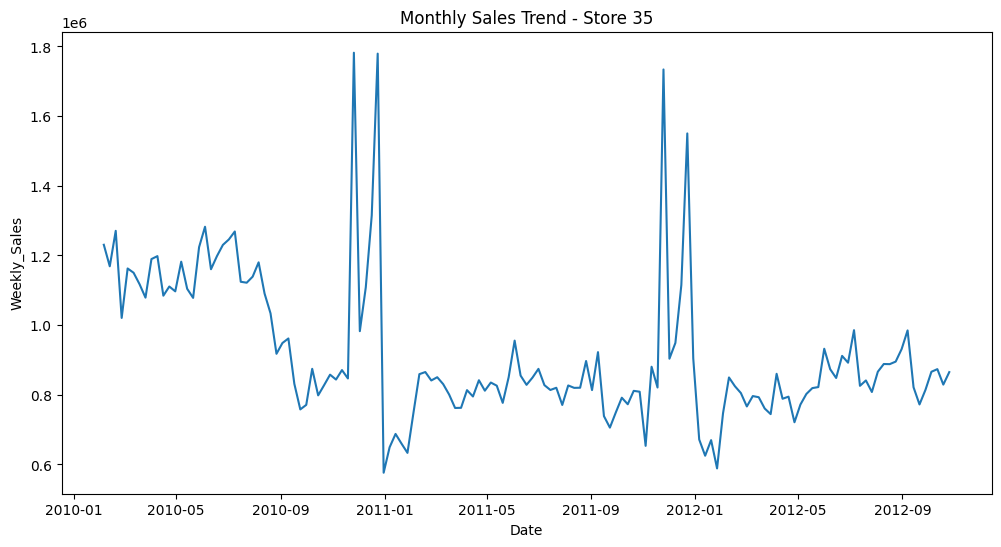

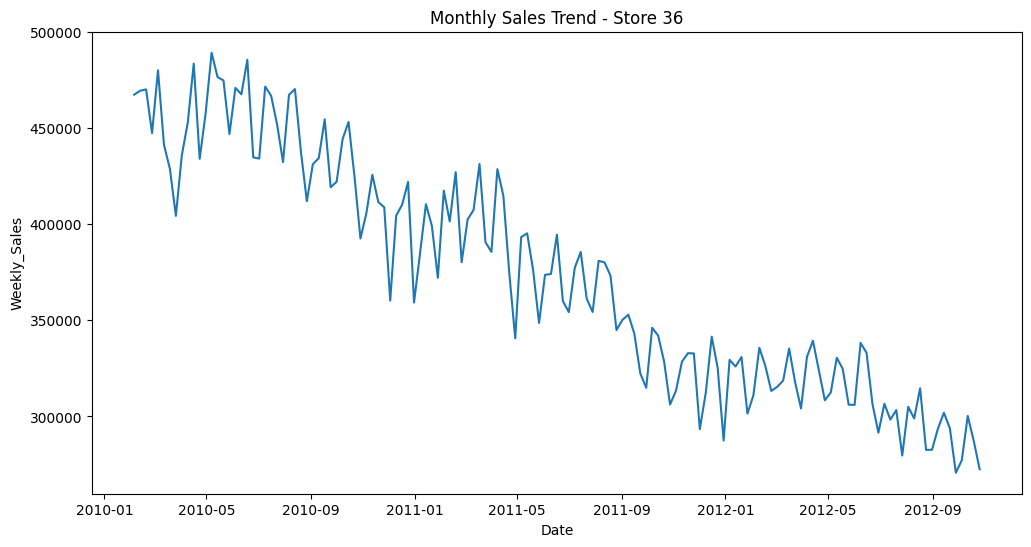

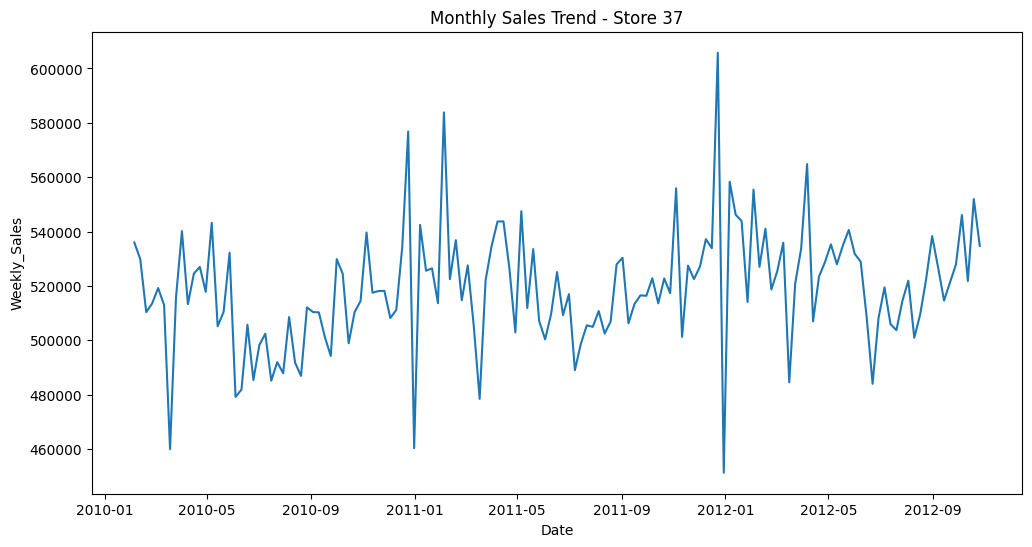

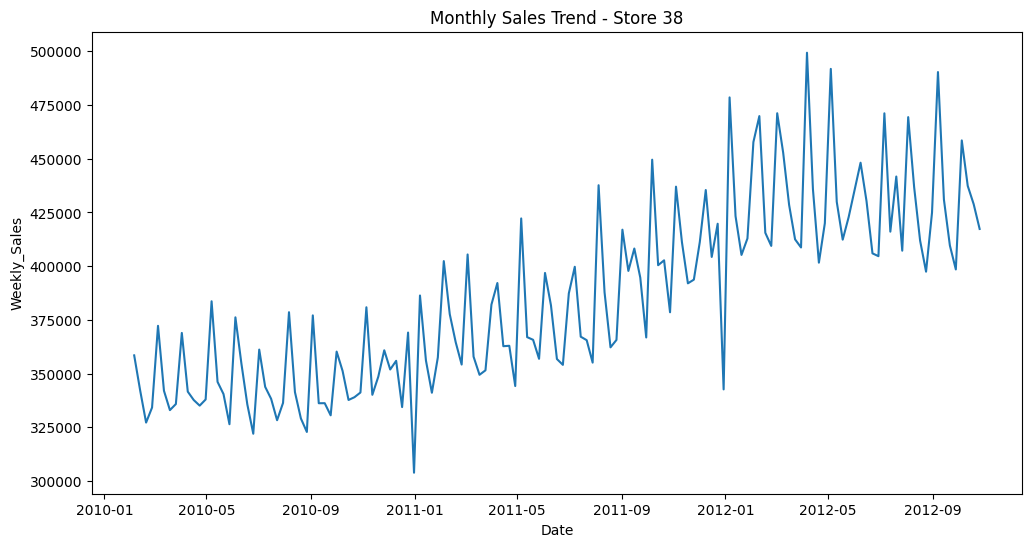

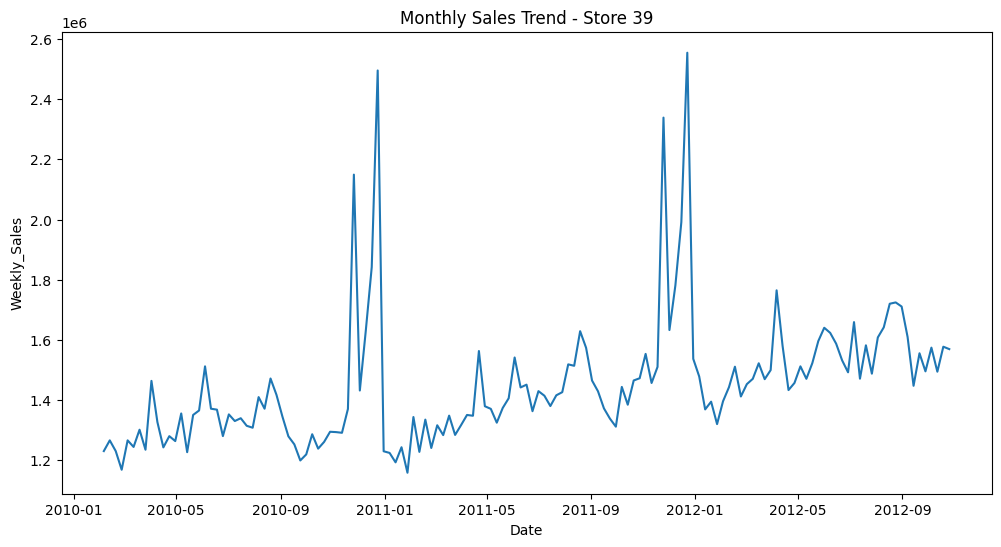

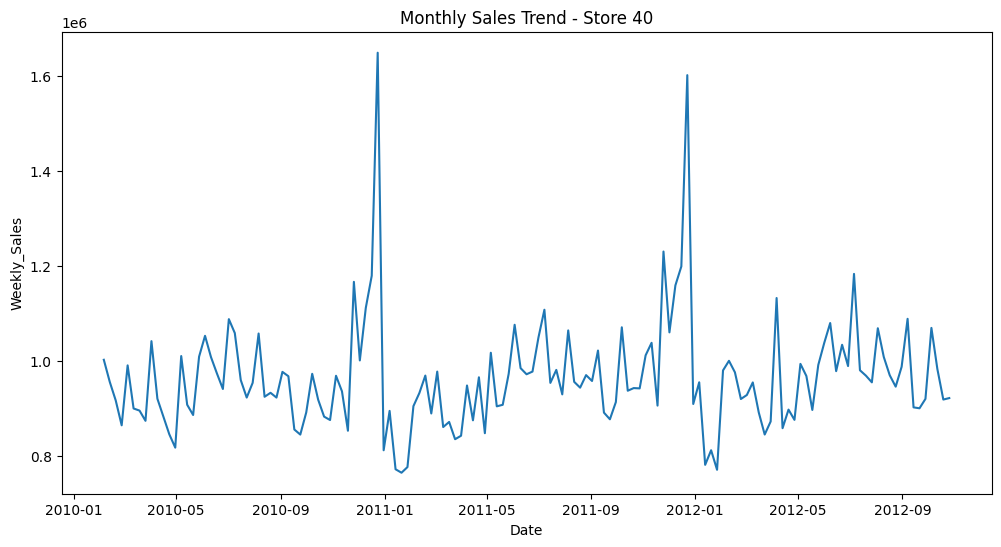

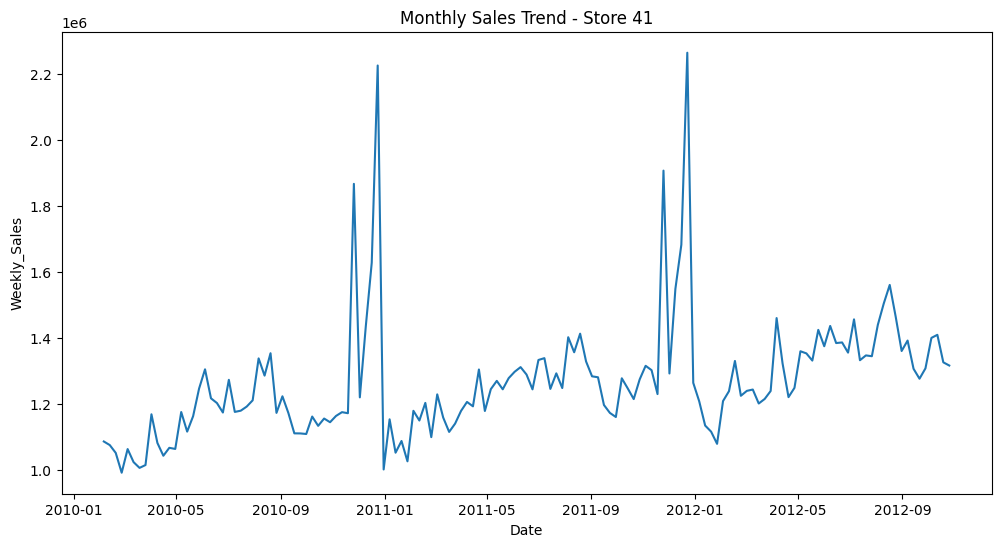

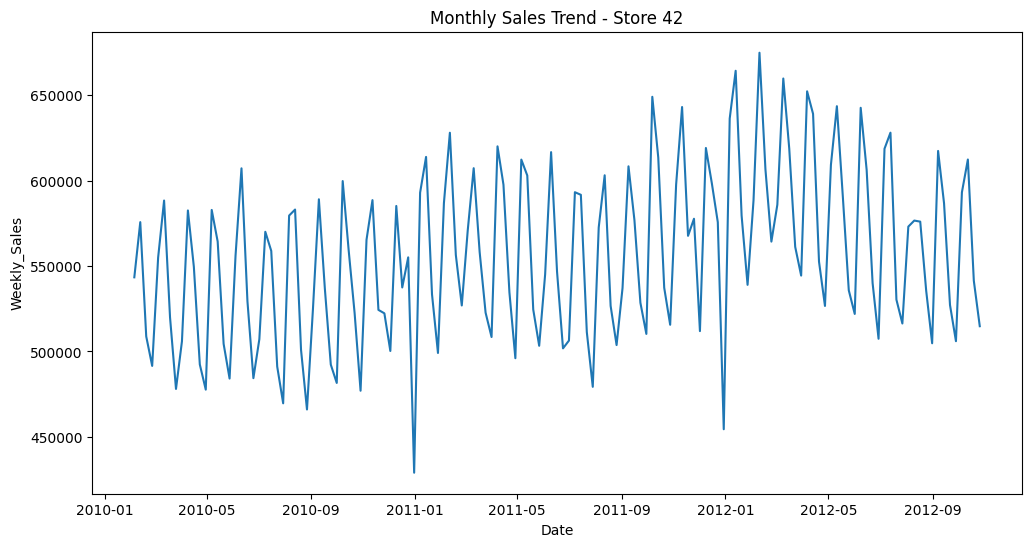

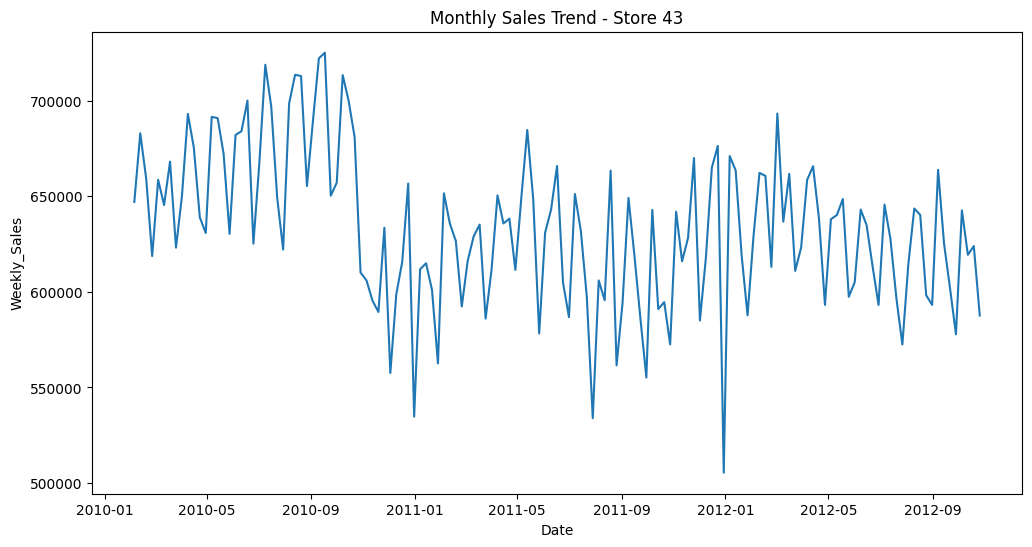

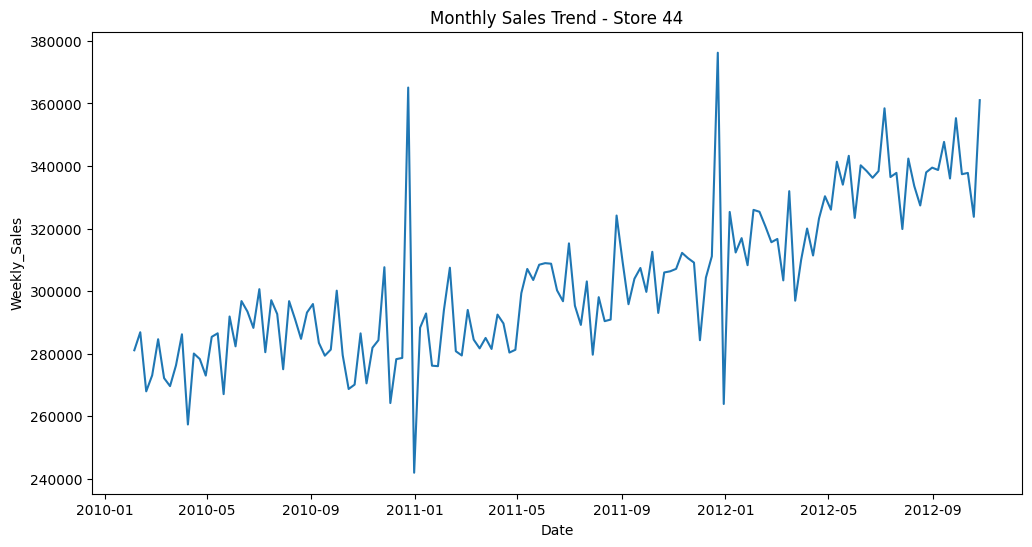

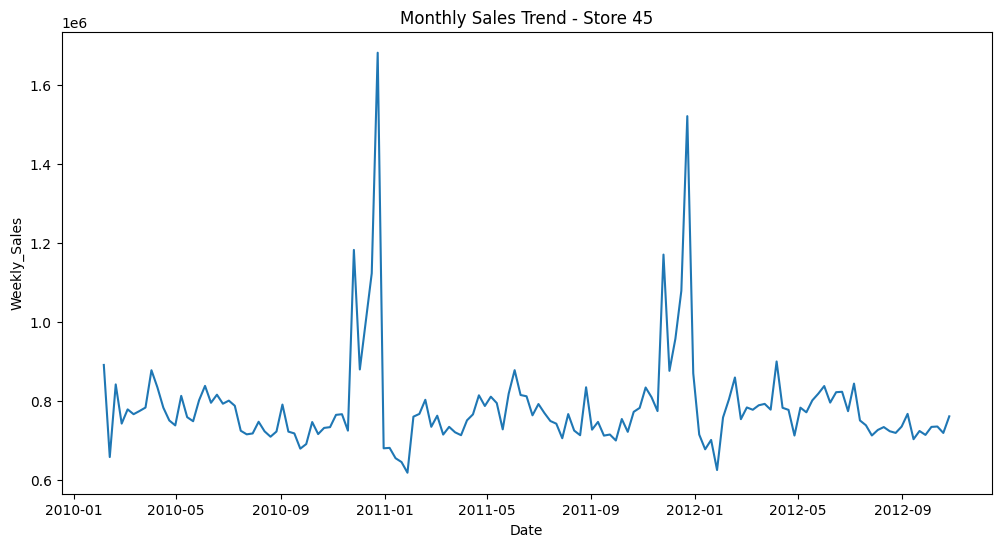

In [33]:
# Line Plot per Store
# ----------------------------
stores = df['Store'].unique()
for store in stores:
    plt.figure(figsize=(12,6))
    store_df = df[df['Store']==store]
    sns.lineplot(x='Date', y='Weekly_Sales', data=store_df)
    plt.title(f'Monthly Sales Trend - Store {store}')
    plt.savefig(f'store_{store}_sales_trend.png', dpi=300, bbox_inches='tight')
    plt.show()

C:\Users\e\AppData\Local\Temp\ipykernel_16600\4266920702.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


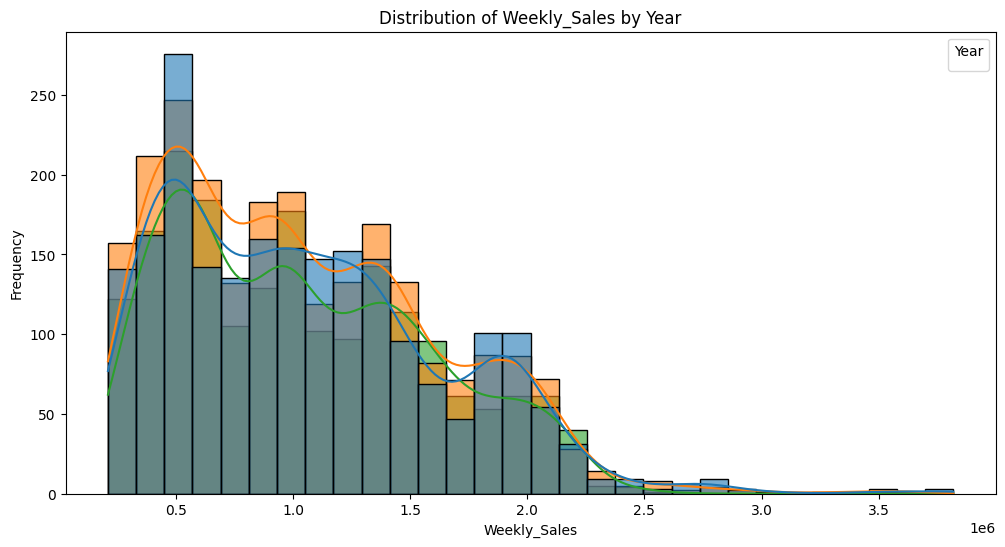

C:\Users\e\AppData\Local\Temp\ipykernel_16600\4266920702.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


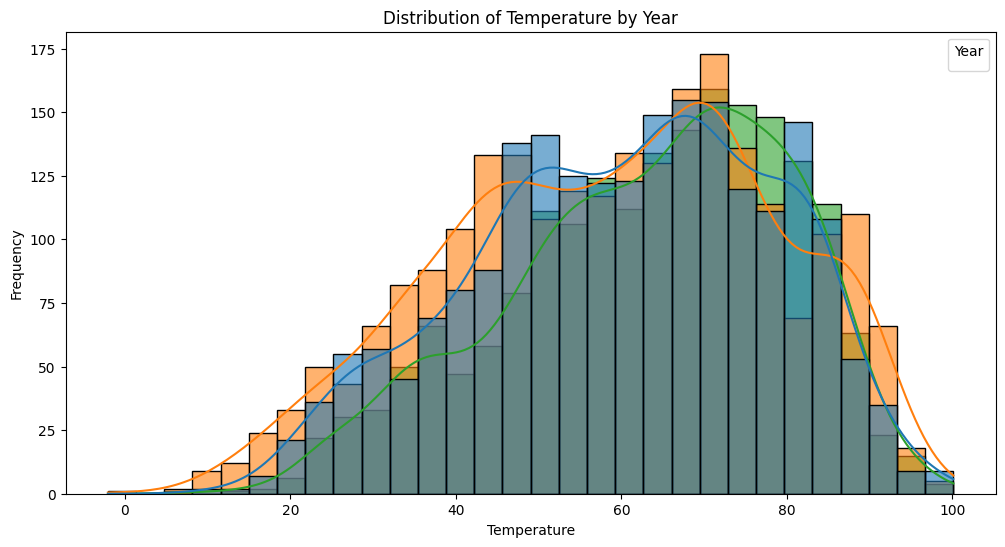

C:\Users\e\AppData\Local\Temp\ipykernel_16600\4266920702.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


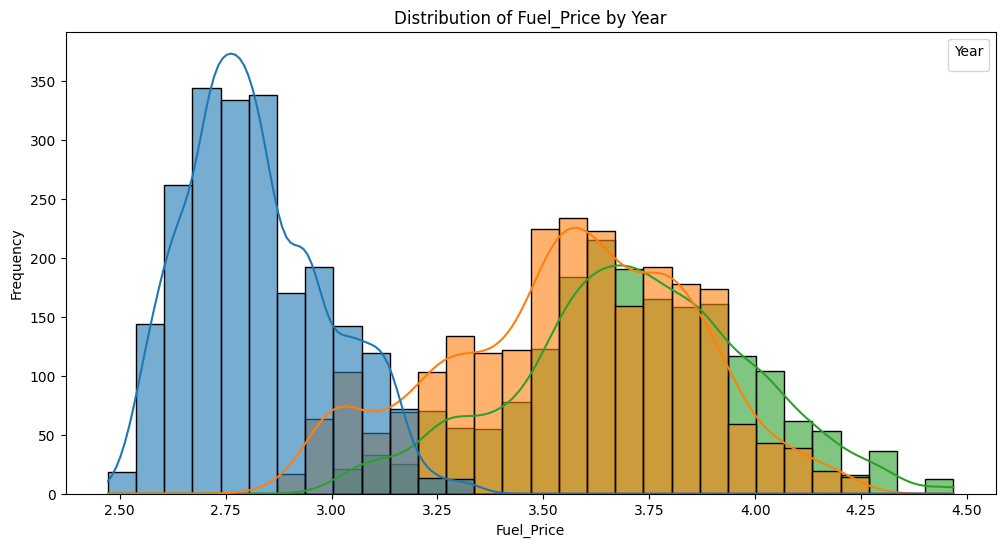

C:\Users\e\AppData\Local\Temp\ipykernel_16600\4266920702.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


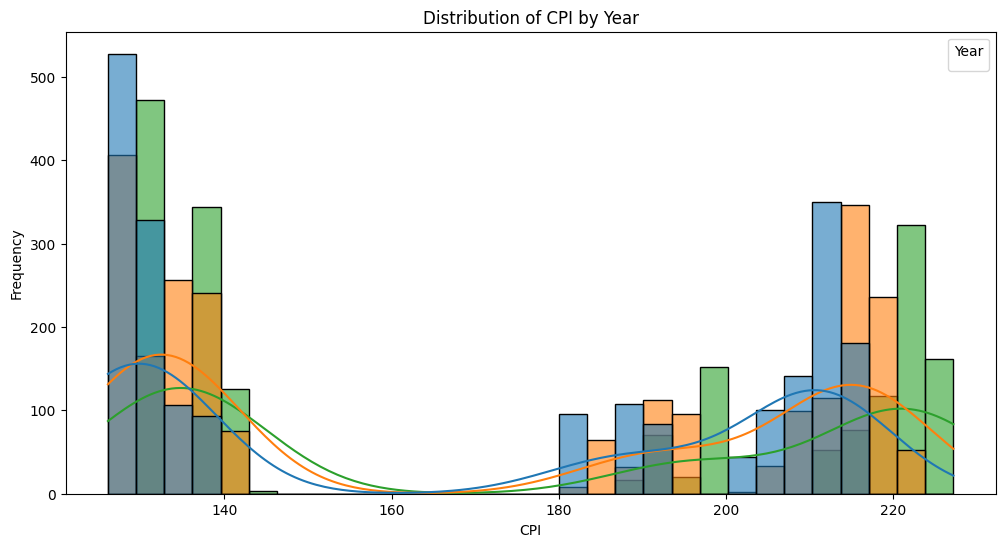

C:\Users\e\AppData\Local\Temp\ipykernel_16600\4266920702.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


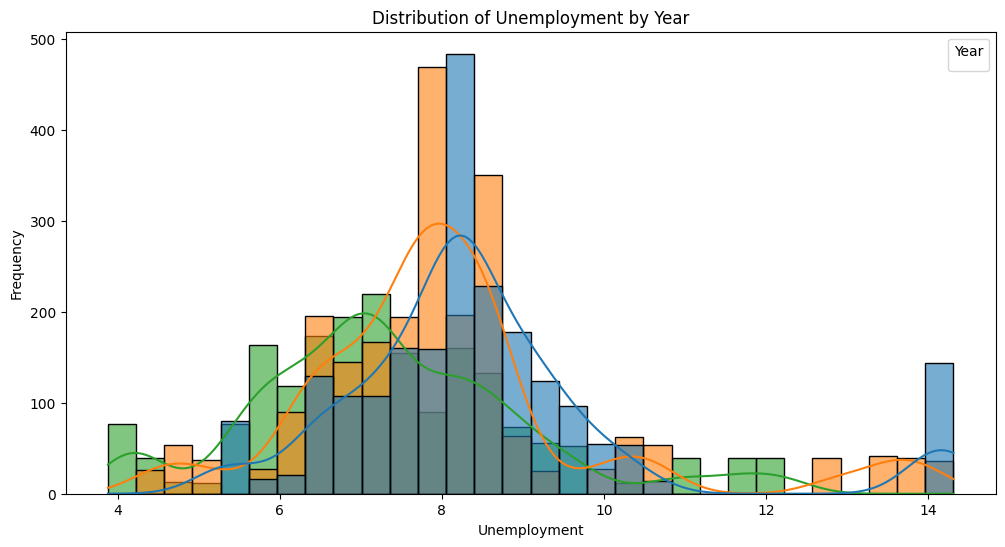

In [34]:
# Histograms by Year
# ----------------------------
for col in numeric_df.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df, x=col, hue='Year', bins=30, kde=True, palette='tab10', alpha=0.6)
    plt.title(f'Distribution of {col} by Year')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Year')
    plt.savefig(f"{col}_hist_by_year.png", dpi=300, bbox_inches='tight')
    plt.show()


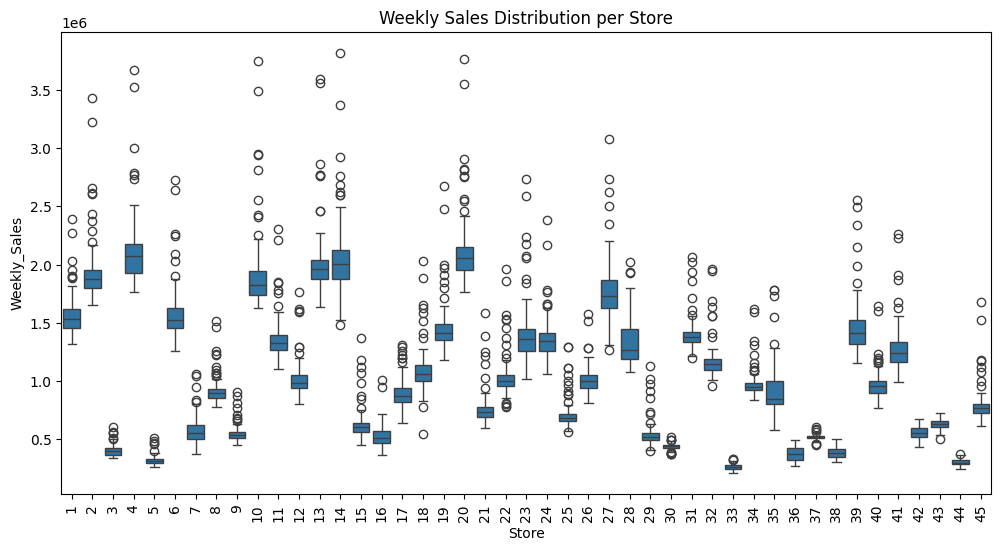

In [35]:
# Boxplot of Weekly Sales per Store
# ----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution per Store')
plt.xticks(rotation=90)
plt.savefig("store_sales_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()


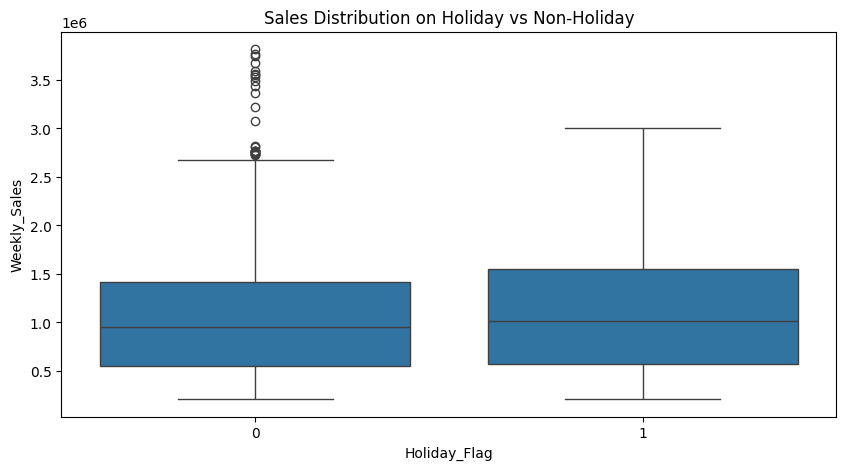

In [36]:
# Holiday Effect on Sales
# ----------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Sales Distribution on Holiday vs Non-Holiday')
plt.savefig("holiday_sales.png", dpi=300, bbox_inches='tight')
plt.show()

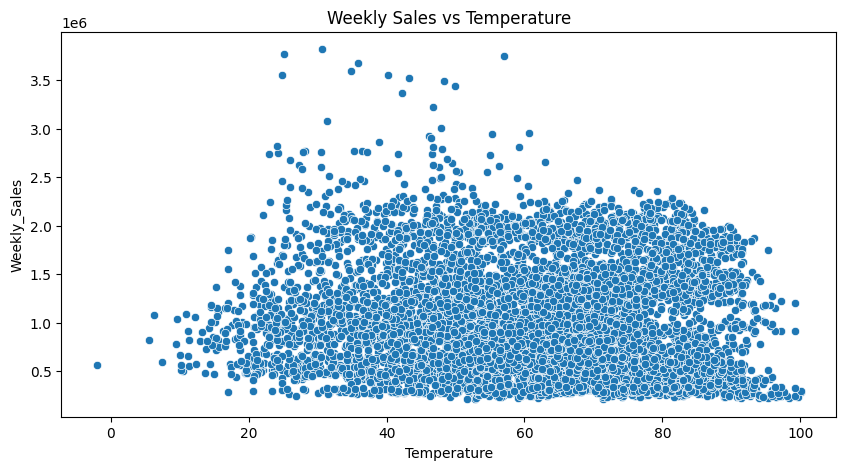

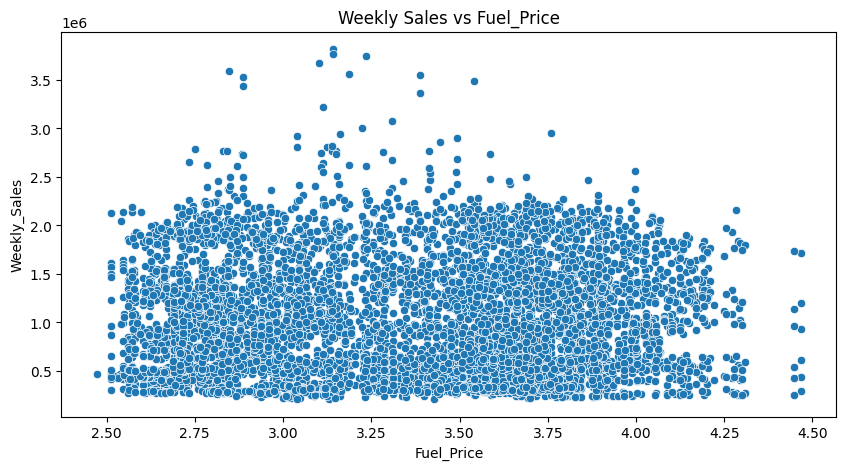

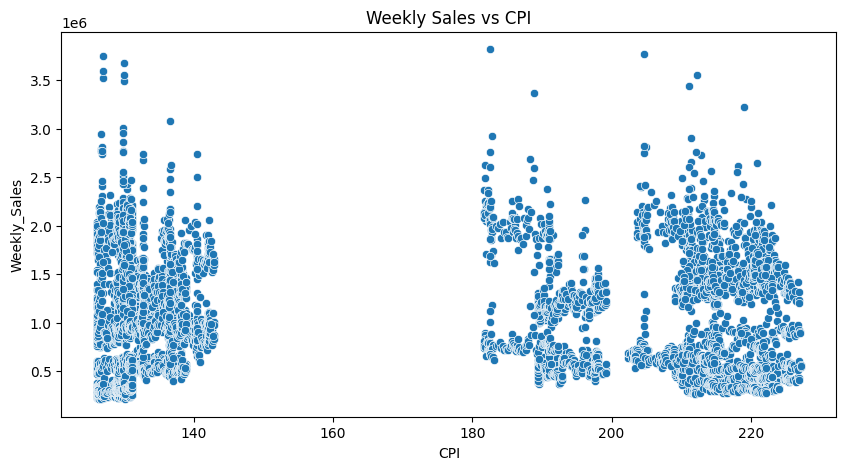

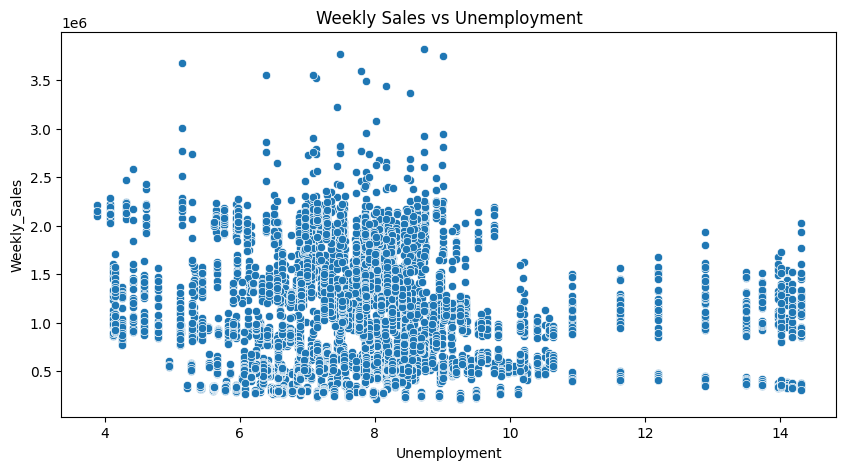

In [37]:
# Scatter Plots: Weekly Sales vs Other Numeric Columns
# ----------------------------
for col in ['Temperature','Fuel_Price','CPI','Unemployment']:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=col, y='Weekly_Sales', data=df)
    plt.title(f'Weekly Sales vs {col}')
    plt.savefig(f'sales_vs_{col}.png', dpi=300, bbox_inches='tight')
    plt.show()

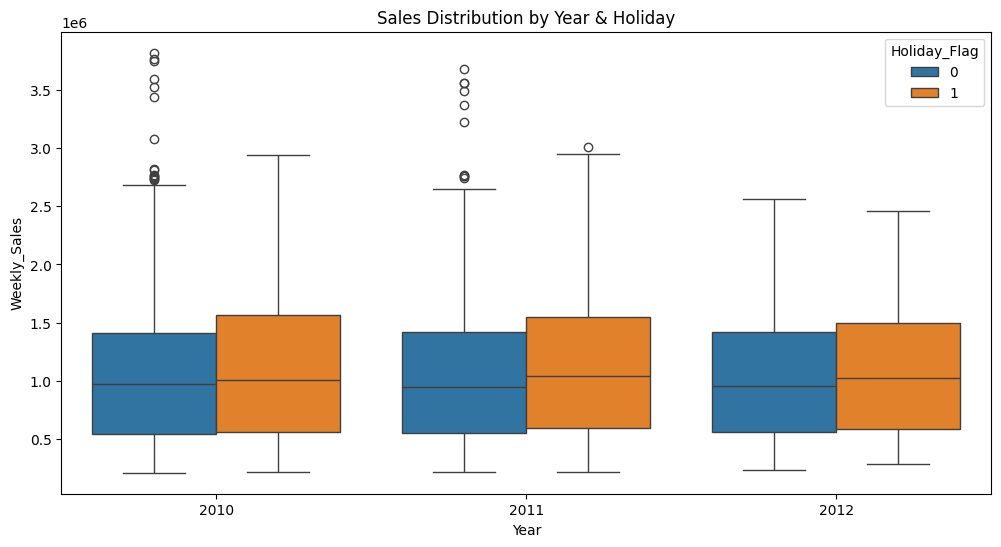

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='Weekly_Sales', hue='Holiday_Flag', data=df)
plt.title('Sales Distribution by Year & Holiday')
plt.show()


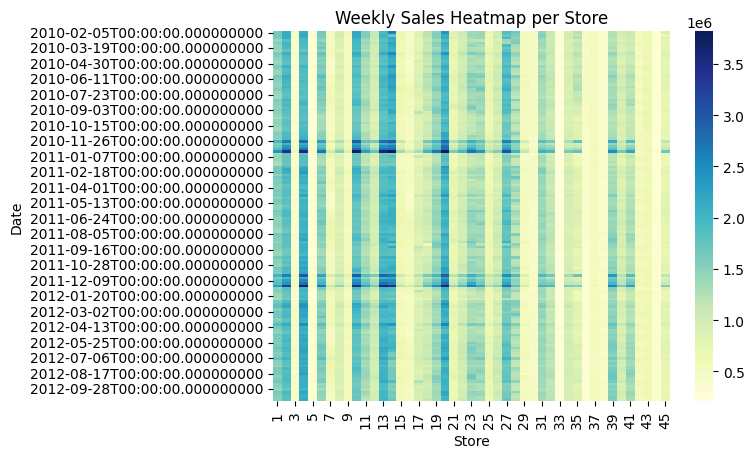

In [39]:
pivot = df.pivot_table(values='Weekly_Sales', index='Date', columns='Store')
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Weekly Sales Heatmap per Store')
plt.show()


# Data Train & Preparation

In [40]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date') # Ensure time order


# Create time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek


# Lag features
df['Sales_Lag_1'] = df['Weekly_Sales'].shift(1)
df['Sales_Lag_2'] = df['Weekly_Sales'].shift(2)


# Rolling average feature
df['Rolling_Mean_4'] = df['Weekly_Sales'].rolling(window=4).mean()
df.dropna(inplace=True)


features = ['Year','Month','WeekOfYear','DayOfWeek','Sales_Lag_1','Sales_Lag_2','Rolling_Mean_4']
X = df[features]
y = df['Weekly_Sales']

# Train/Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardization

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Regression

In [43]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print('KNN RMSE:', rmse_knn)

KNN RMSE: 429362.2085002444


# Linear Regression

In [44]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print('Linear Regression RMSE:', rmse_lr)

Linear Regression RMSE: 383405.996419984


# Time Series Forecasting with XGBoost

In [45]:
ts_split = TimeSeriesSplit(n_splits=5)
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

for train_index, val_index in ts_split.split(X):
    X_train_t, X_val_t = X.iloc[train_index], X.iloc[val_index]
    y_train_t, y_val_t = y.iloc[train_index], y.iloc[val_index]
    
    xgb_model.fit(X_train_t, y_train_t)
    y_pred_t = xgb_model.predict(X_val_t)
    
    rmse = np.sqrt(mean_squared_error(y_val_t, y_pred_t))
    print('Fold RMSE:', rmse)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print('XGBoost Test RMSE:', rmse_xgb)

Fold RMSE: 488386.5270476185
Fold RMSE: 407962.027061875
Fold RMSE: 441067.5126535947
Fold RMSE: 456046.8425634729
Fold RMSE: 424239.7843727635
XGBoost Test RMSE: 399495.7222460018


# Seasonal Decomposition

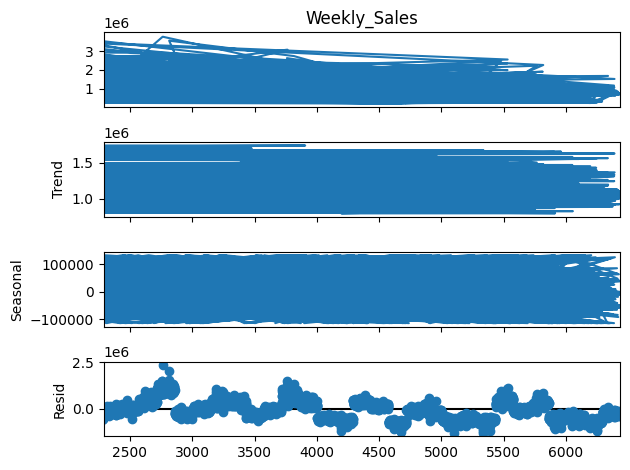

In [46]:
result = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52) # yearly seasonality
result.plot()
plt.show()

#  Plot Trend, Seasonality, Residual separately

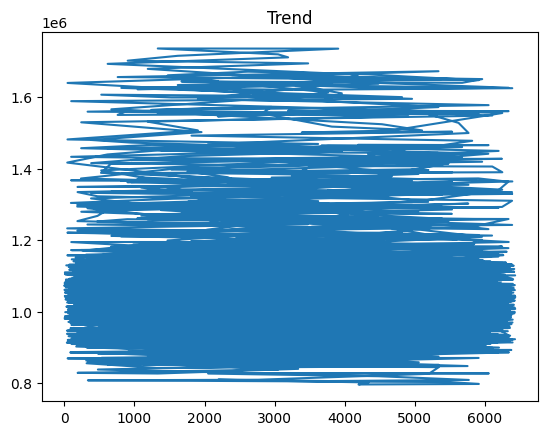

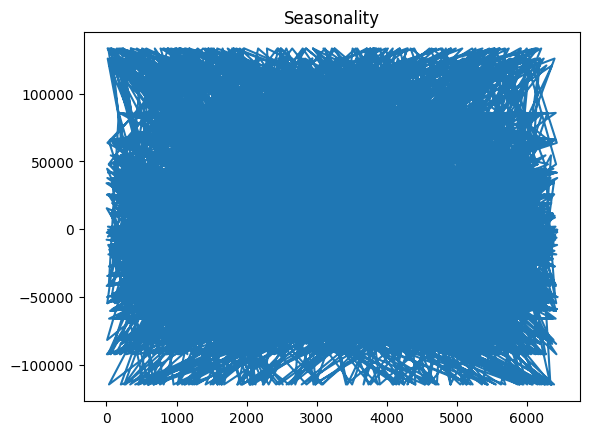

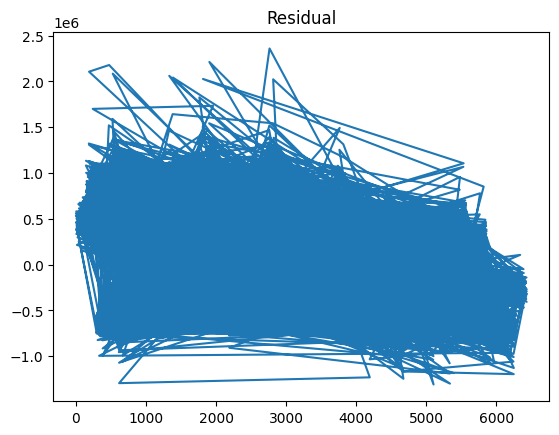

In [47]:
result.trend.plot(title='Trend')
plt.show()
result.seasonal.plot(title='Seasonality')
plt.show()
result.resid.plot(title='Residual')
plt.show()

# Clustering (KMeans)

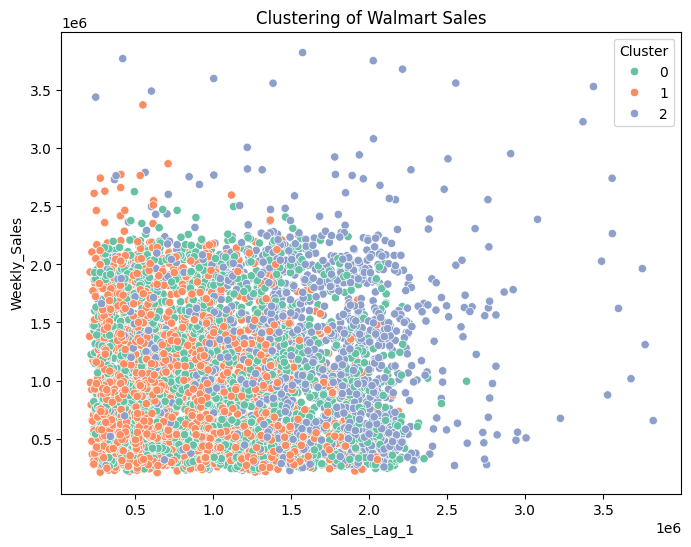

In [48]:
features_cluster = ['Year','Month','WeekOfYear','DayOfWeek','Sales_Lag_1','Sales_Lag_2','Rolling_Mean_4']
X_cluster = df[features_cluster]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Sales_Lag_1'], y=df['Weekly_Sales'], hue=df['Cluster'], palette='Set2')
plt.title('Clustering of Walmart Sales')
plt.show()

# PCA

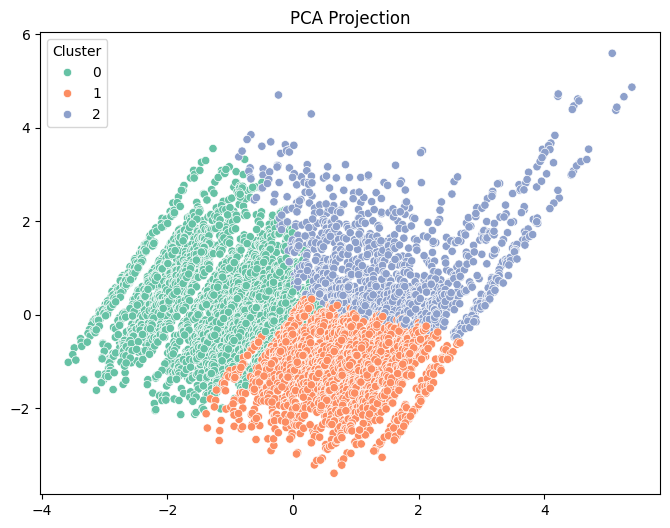

In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'][:len(X_pca)], palette='Set2')
plt.title('PCA Projection')
plt.show()

# 13. ROC Curve Example

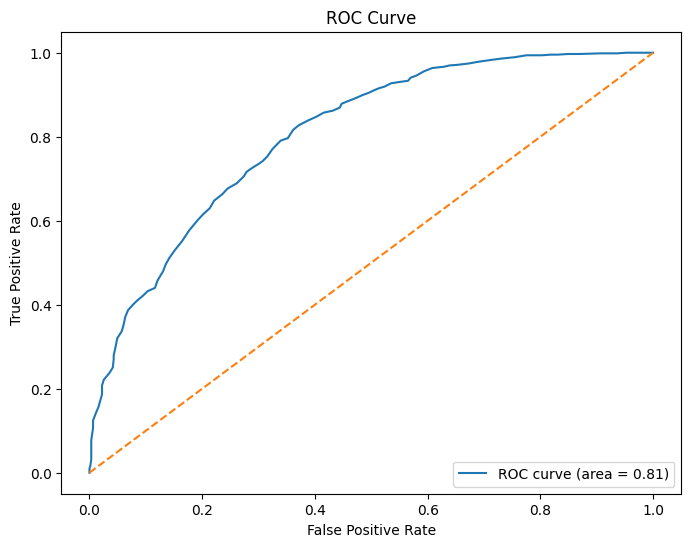

In [50]:
y_class = (y > y.median()).astype(int)
y_train_c, y_test_c = train_test_split(y_class, test_size=0.2, shuffle=False)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train_c)
y_score = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_c, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Plot for XGBoost

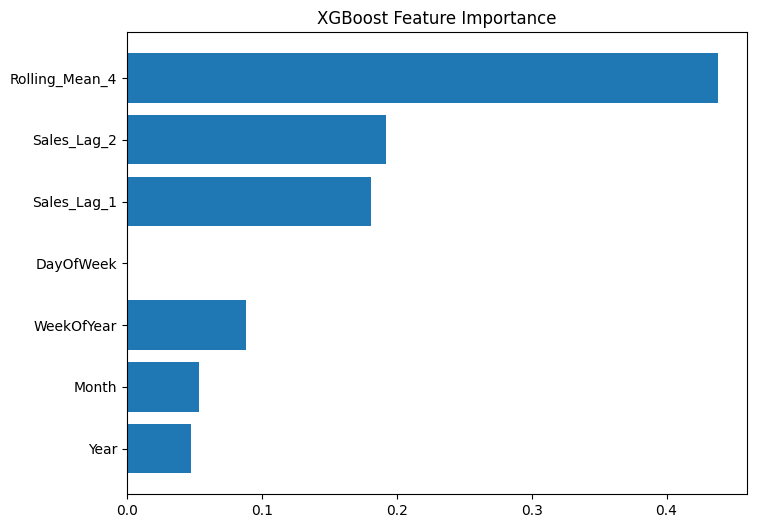

In [51]:
importances = xgb_model.feature_importances_
plt.figure(figsize=(8,6))
plt.barh(features, importances)
plt.title('XGBoost Feature Importance')
plt.show()

# Hyperparameter Tuning for XGBoost using GridSearchCV

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best RMSE: 405352.02113966196


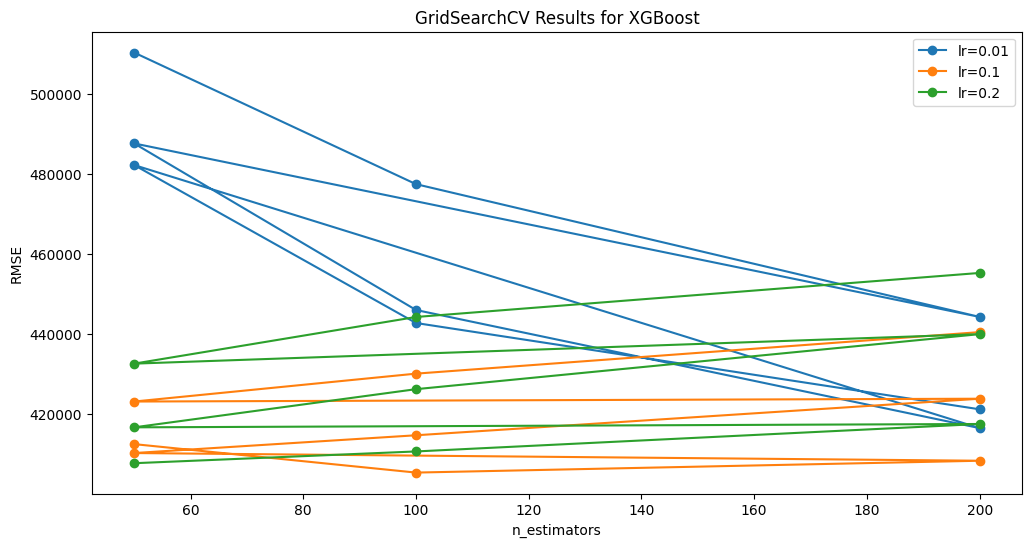

In [52]:
#Hyperparameter Tuning for XGBoost

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42), 
    param_grid, 
    cv=3, 
    scoring='neg_root_mean_squared_error'
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# أفضل Parameters و RMSE
print('Best Parameters:', grid_search.best_params_)
print('Best RMSE:', -grid_search.best_score_)

# ------------------- Plot GridSearch Results -------------------
# نحول النتائج لكائن DataFrame عشان نرسمها
results = pd.DataFrame(grid_search.cv_results_)

# Plot RMSE لكل n_estimators مع max_depth و learning_rate مختلفة
plt.figure(figsize=(12,6))
for lr in param_grid['learning_rate']:
    subset = results[results['param_learning_rate'] == lr]
    plt.plot(subset['param_n_estimators'], -subset['mean_test_score'], marker='o', label=f'lr={lr}')

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('GridSearchCV Results for XGBoost')
plt.legend()
plt.show()

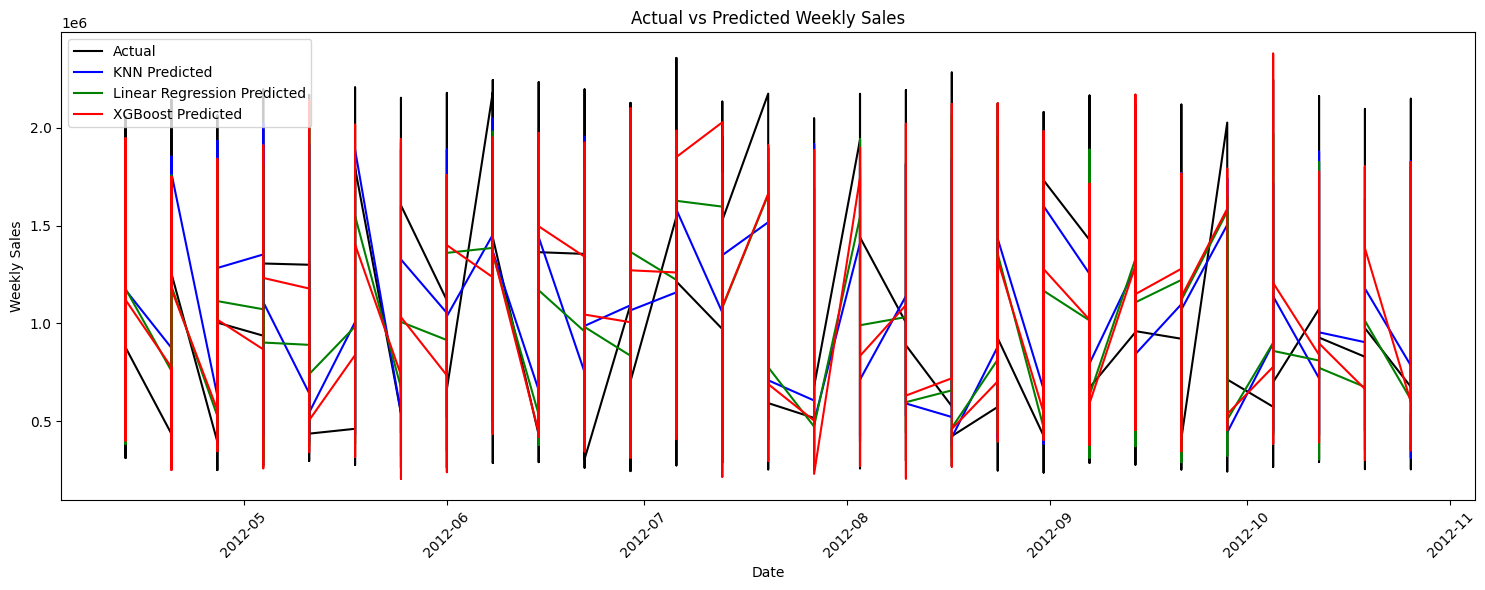

In [53]:
plt.figure(figsize=(15,6))

# Plot actual sales
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual', color='black')

# Plot predictions
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_knn, label='KNN Predicted', color='blue')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_lr, label='Linear Regression Predicted', color='green')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_xgb, label='XGBoost Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300)
plt.show()
